In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats

In [2]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [3]:
import matplotlib.pyplot as plt
import numbers
import pandas as pd
import plotly.express as px
import psycopg2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# import test

db_conc = {
    "host"      : "suicide-db.cfnbykir9i4m.us-east-1.rds.amazonaws.com",
    "database"  : "suicide",
    "user"      : "postgres",
    "password"  : "Password"
}
column_names = ["Id", "country", "year", "sex", "age", "suicides_no", "population", "suicides/100k_pop", "country_year", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation"]


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Data preprocessing/cleaning
We retrieve data from the PostGresQL database and clean it so that all categorical variables are integer encoded, unused columns are removed (country_year and generation), and we minimize the amount of null data within our dataframe.

In [4]:
!unzip -qq data.zip -d ./
def connect(db_conc):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        conn = psycopg2.connect(**db_conc)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    return conn


def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df





# ----------------------- DATA PROCESSMENT ----------

# Connect to the database
conn = connect(db_conc)
column_names = ["Id", "country", "year", "sex", "age", "suicides_no", "population", "suicides/100k_pop", "country_year", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation"]
# Execute the "SELECT *" query
d = postgresql_to_dataframe(conn, "select * from public.suicide", column_names)
d.head()

replace ./data/europe.geojson? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


,Id,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [5]:
# data preprocessing


sex_encoder = LabelEncoder() 
age_encoder = LabelEncoder() 
gen_encoder = LabelEncoder() 
# male=1, female=0
df = d.copy()
df['sex'] = sex_encoder.fit_transform(df['sex'])
age_labels = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
# 0=15-24, 1=25-34, 2=35-54, 3=5-14 4=55-74 5=75+, 
age_encoder.fit(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
df['age'] = age_encoder.transform(df['age'])
gen_encoder.fit(['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z'])
df['generation'] = gen_encoder.transform(df['generation'])
df['gdp_for_year'] = df['gdp_for_year'].replace(',','', regex=True)
df['gdp_for_year']=df['gdp_for_year'].astype('uint64')
df.index
df = df.drop(labels=['country_year', "Id"], axis=1)

In [6]:
df["country"].unique()

array(['Albania', 'Antigua and Barbuda', 'Aruba', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Canada', 'Chile', 'Cuba', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Cyprus', 'Fiji',
       'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cabo Verde', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador',
       'Estonia', 'Georgia', 'Finland', 'France', 'Grenada', 'Germany',
       'Greece', 'Guyana', 'Guatemala', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati',
       'Kuwait', 'Malta', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macau', 'Maldives', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', '

In [7]:
df.describe()

,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
count,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,0.500000,2.499425,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414,2.701869
std,8.469055,0.500009,1.708754,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472,1.809836
min,1985.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000,0.000000
25%,1995.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000,1.000000
50%,2002.000000,0.500000,2.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000,2.000000
75%,2008.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000,4.000000
max,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000,5.000000


year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

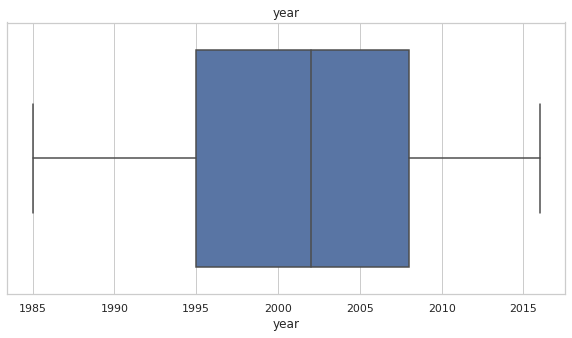

sex


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


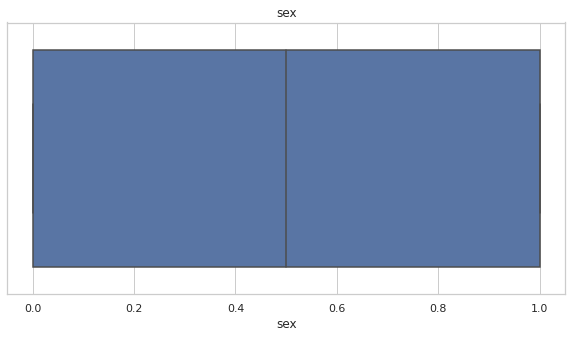

age


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


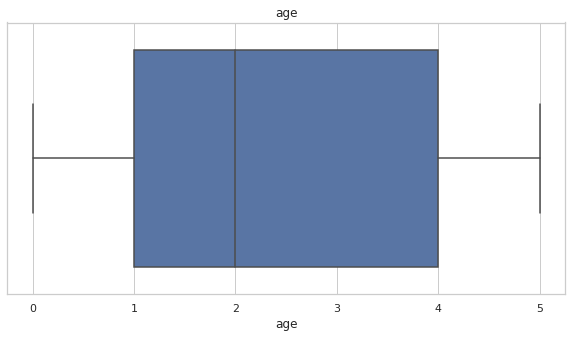

suicides_no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


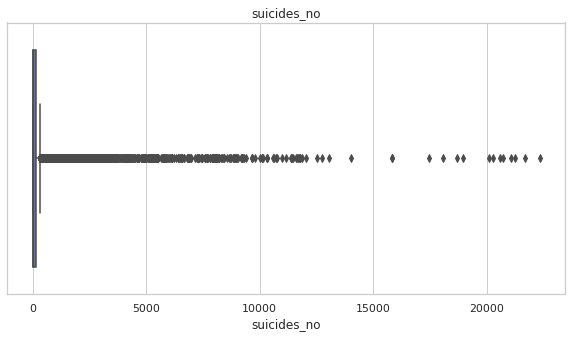

population


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


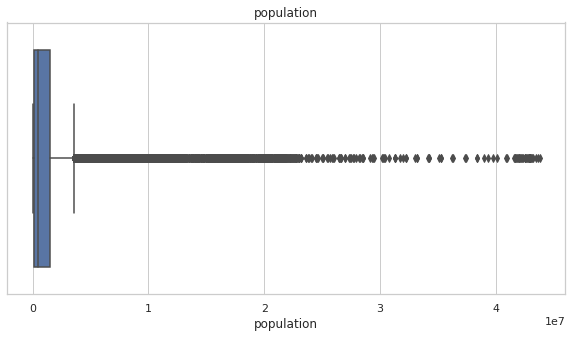

suicides/100k_pop


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


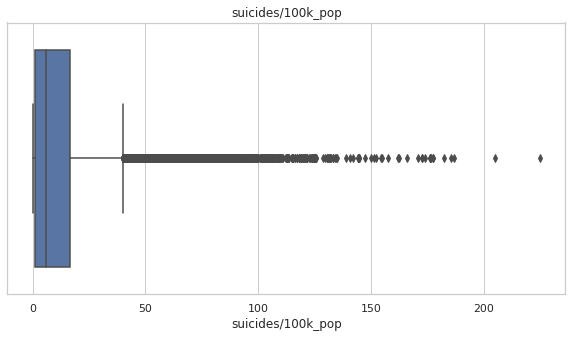

HDI_for_year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


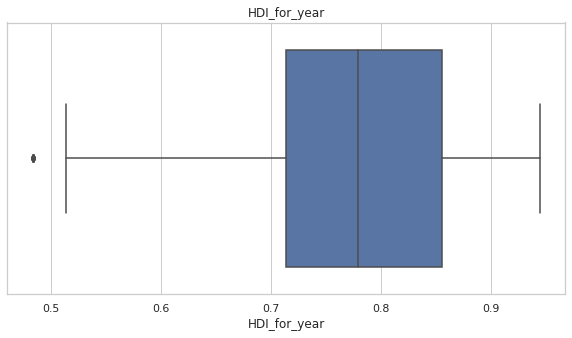

gdp_for_year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


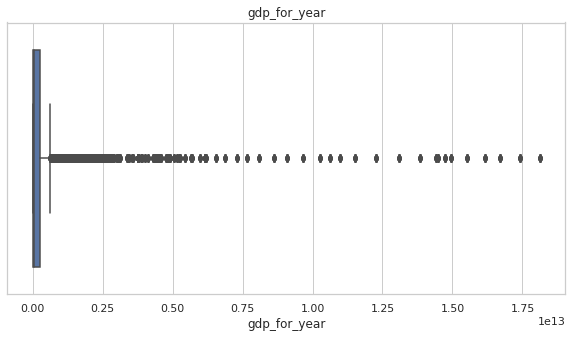

gdp_per_capita


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


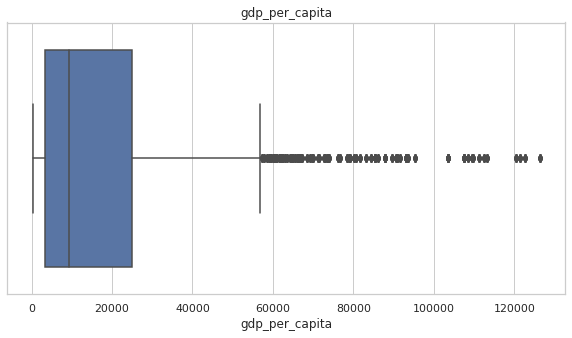

generation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


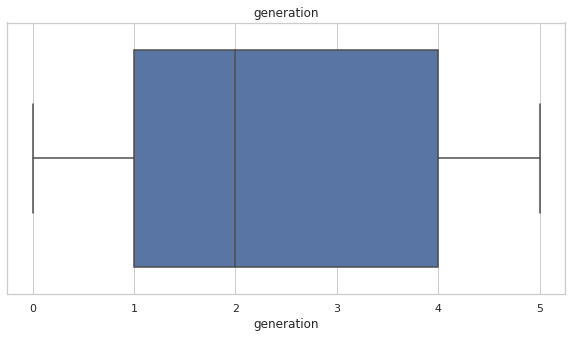

In [8]:
# Box charts for all non-categorical variables; this helps us get a better idea of the distribution of our data
plt.figure(figsize=(10,5))
for i in df.columns:
    if (isinstance(df[i][0], numbers.Number)):
        plt.figure(figsize=(10,5))
        print(i)
        sns.set(style='whitegrid')
        sns.boxplot(df[i]).set(title=i)
        plt.show()

In [9]:
# counts % of null values per column; it is very high for HDI_for_year when we initially run it (approx. 69.9%)
df.isnull().sum()/df.count()[1]
# df.count()

country              0.000000
year                 0.000000
sex                  0.000000
age                  0.000000
suicides_no          0.000000
population           0.000000
suicides/100k_pop    0.000000
HDI_for_year         0.699353
gdp_for_year         0.000000
gdp_per_capita       0.000000
generation           0.000000
dtype: float64

In [10]:
# Gets the indices of the rows where HDI_for_year
null_indices = df[df["HDI_for_year"].isnull()].index
null_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            27750, 27751, 27752, 27753, 27754, 27755, 27756, 27757, 27758,
            27759],
           dtype='int64', length=19456)

In [11]:
# Loads additional HDI data; more information on the data source at 
# https://frdelpino.es/investigacion/en/category/01_social-sciences/02_world-economy/03_human-development-world-economy/?lang=en 
# u_df = pd.read_csv("data/world_unemployment.csv", index_col=0)
# u_df.dropna(how='all', axis=0, inplace=True)
# years = u_df.columns[1:].astype('uint64', copy=True)

# u_df

# # Replaces as many null HDI spots as possible with either the exact HDI from hdi_df 
# # or an average of the HDI for the neighboring years (if the exact year is not in hdi_df)
# for i in null_indices:
#     row = df.loc[i]
# #     print(row['country'], row['year'])
#     try:
#         if row['country'] in hdi_df.index:
            
#             if u_df.loc[row['country']][str(row['year'])]:
# #                 print(hdi_df.loc[row['country']][str(row['year'])])
#                 df.at[i, 'unemployment_for_year'] = hdi_df.loc[row['country']][str(row['year'])]
#     except:
# #         print('\t', years[years.size - 1])
#         if row['year'] > years[years.size - 1]:
#             row_year = years.size - 1
#             df.at[i, 'unemployment_for_year'] = hdi_df.loc[row['country']][row_year]
#         elif row['year'] < years[0]:
#             row_year = 0
#             df.at[i, 'unemployment_for_year'] = hdi_df.loc[row['country']][row_year]
#         else:
#             row_year = years.searchsorted(row.year)
#             df.at[i, 'unemployment_for_year'] = (hdi_df.loc[row['country']][row_year] +
#                                    hdi_df.loc[row['country']][row_year-1])/2


# # For the rest of the null values, we will set to the mean of all HDI_for_year values
# HDI_mean = df['unemployment_for_year'].mean()
# df['unemployment_for_year'].fillna(value=HDI_mean, inplace=True)
# print("done!")

In [12]:

# Loads additional HDI data; more information on the data source at 
# https://frdelpino.es/investigacion/en/category/01_social-sciences/02_world-economy/03_human-development-world-economy/?lang=en 
hdi_df = pd.read_csv("data/AHDI_1.1-1.csv", index_col=0)
hdi_df.dropna(how='all', axis=0, inplace=True)
years = hdi_df.columns[1:].astype('uint64', copy=True)

# Replaces as many null HDI spots as possible with either the exact HDI from hdi_df 
# or an average of the HDI for the neighboring years (if the exact year is not in hdi_df)
for i in df.index:
    row = df.loc[i]
#     print(row['country'], row['year'])
    try:
        if row['country'] in hdi_df.index:
            
            if u_df.loc[row['country']][str(row['year'])]:
#                 print(u_df.loc[row['country']][str(row['year'])])
                df.at[i, 'HDI_for_year'] = u_df.loc[row['country']][str(row['year'])]
    except:
#         print('\t', years[years.size - 1])
        if row['year'] > years[years.size - 1]:
            row_year = years.size - 1
            df.at[i, 'HDI_for_year'] = hdi_df.loc[row['country']][row_year]
        elif row['year'] < years[0]:
            row_year = 0
            df.at[i, 'HDI_for_year'] = hdi_df.loc[row['country']][row_year]
        else:
            row_year = years.searchsorted(row.year)
            df.at[i, 'HDI_for_year'] = (hdi_df.loc[row['country']][row_year] +
                                   hdi_df.loc[row['country']][row_year-1])/2


# For the rest of the null values, we will set to the mean of all HDI_for_year values
HDI_mean = df['HDI_for_year'].mean()
df['HDI_for_year'].fillna(value=HDI_mean, inplace=True)
print("done!")

done!


After data preprocessing/cleaning, we can analyze the data again to see if any significant distribution changes have occurred.

In [13]:
df.describe()


,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
count,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,0.500000,2.499425,242.574407,1.844794e+06,12.816097,0.493201,4.455810e+11,16866.464414,2.701869
std,8.469055,0.500009,1.708754,902.047917,3.911779e+06,18.961511,0.146072,1.453610e+12,18887.576472,1.809836
min,1985.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,0.156000,4.691962e+07,251.000000,0.000000
25%,1995.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,0.377500,8.985353e+09,3447.000000,1.000000
50%,2002.000000,0.500000,2.000000,25.000000,4.301500e+05,5.990000,0.493201,4.811469e+10,9372.000000,2.000000
75%,2008.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,0.609000,2.602024e+11,24874.000000,4.000000
max,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,0.892000,1.812071e+13,126352.000000,5.000000


year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

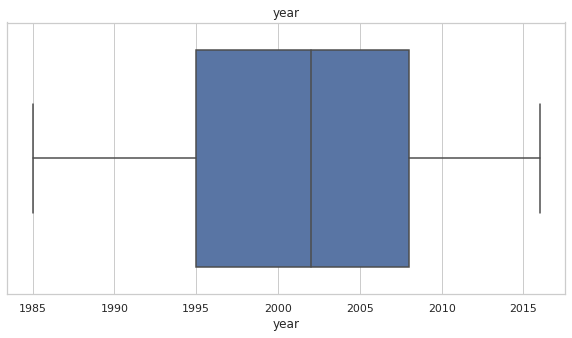

sex


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


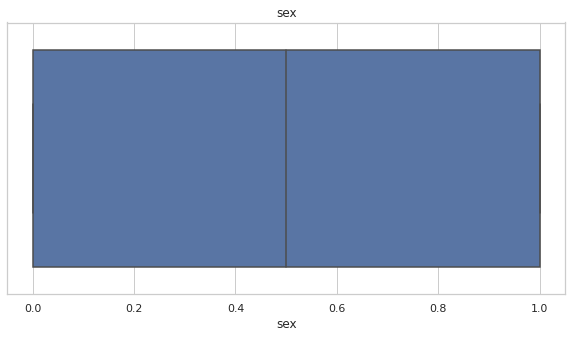

age


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


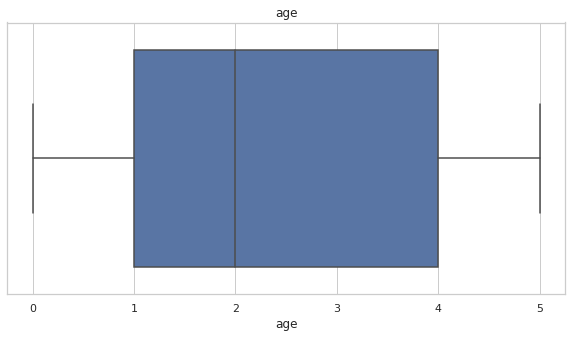

suicides_no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


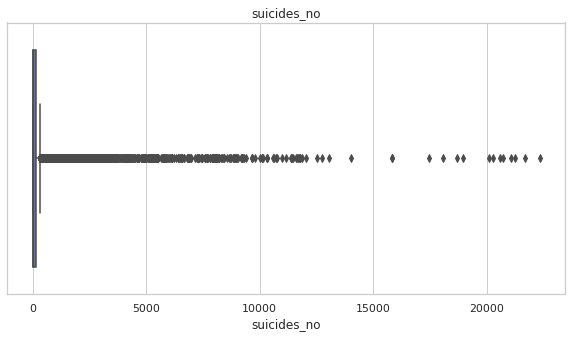

population


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


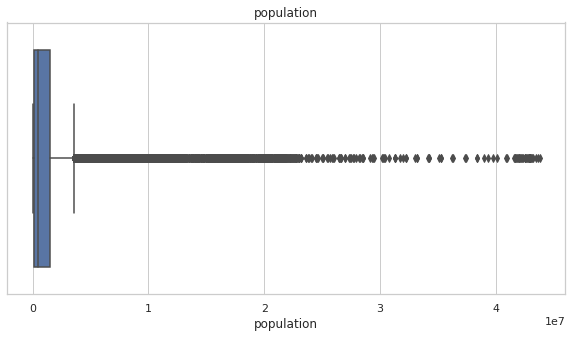

suicides/100k_pop


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


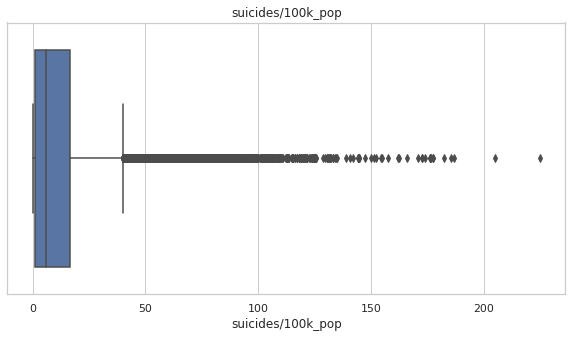

HDI_for_year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


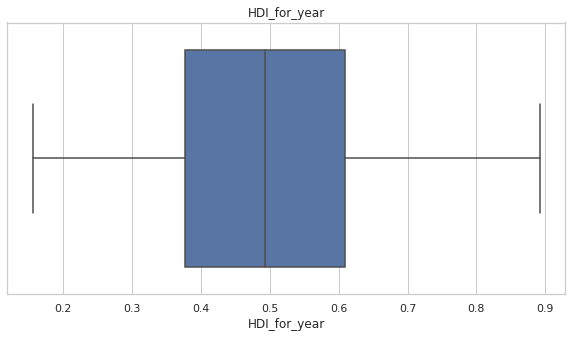

gdp_for_year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


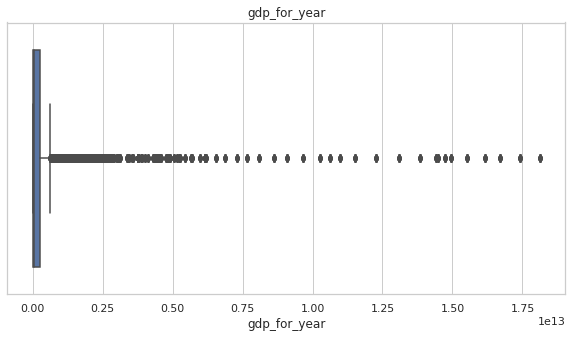

gdp_per_capita


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


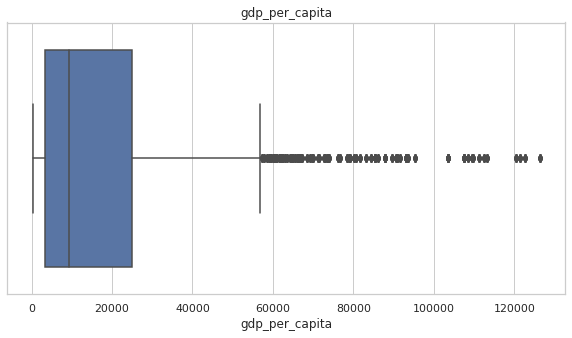

generation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


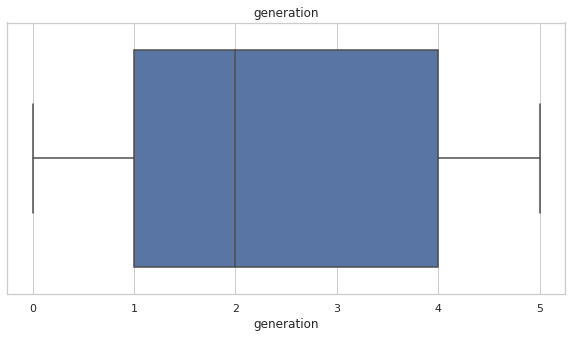

In [14]:
plt.figure(figsize=(10,5))
for i in df.columns:
    if (isinstance(df[i][0], numbers.Number)):
        plt.figure(figsize=(10,5))
        print(i)
        sns.set(style='whitegrid')
        sns.boxplot(df[i]).set(title=i)
        plt.show()

In [15]:
# counts % of null values per column after fixing null values in HDI_for_year
df.isnull().sum()/df.count()[1]

country              0.0
year                 0.0
sex                  0.0
age                  0.0
suicides_no          0.0
population           0.0
suicides/100k_pop    0.0
HDI_for_year         0.0
gdp_for_year         0.0
gdp_per_capita       0.0
generation           0.0
dtype: float64

# Data Analysis and Visualization

In this section we are visualizing the data by grouping by country and year as well as selecting from specific countries of interest. We isolate these countries of interest by comparing the suicides/100k_pop across all countries and ranking those with the highest and lowest ratio. We also investigate the correlations between each feature to find promising features for our regression model. 

The most interesting find was that, contrary to our belief, gdp_for_year, gdp_per_capita, and HDI_for_year have low correllation with suicides_no and suicides/100k_pop. Instead, the most promising features when looking at specific countries and the world were population, sex, age. We saw that for individual countries there were more features that were relatively strongly correlated with suicide_no and suicide/100k_pop, so we decided that we would calculate indiviual regression models for each country of interest.
 

In [16]:
# displays average suicides/100k population for all countries, 
# as well as the countries with the highest and lowest averages
df_country_suicide = df.groupby('country')['suicides/100k_pop']

av_suicides = pd.DataFrame(df_country_suicide.mean().sort_values(ascending=False))
# av_suicides.drop
# print(av_suicides[av_suicides < 20].index)
# av_suicides.drop(labels=av_suicides[av_suicides < 20].index)
# print(av_suicides.size)
fig = px.bar(df, x=df['year'].unique(), y=df.groupby(['year'])['suicides_no'].sum())
# fig = px.bar(df, x=av_suicides.index, y=av_suicides)


# Note about 2016, only has 16 countries with suicide data, 1992 only 42
# 1992-2008 (potentially just 1999-2008) for historical worldwide context


fig.show()
# Valid countries have at least 100 samples we can perform regression training on
valid_countries = av_suicides[(df_country_suicide.count() > 100)]
print(valid_countries[(av_suicides > 20)].dropna())
high_suicide_countries = valid_countries[(av_suicides > 20)].dropna().index
print(valid_countries[(av_suicides < 5)].dropna())
low_suicide_countries = valid_countries[(av_suicides < 5)].dropna().index

                    suicides/100k_pop
country                              
Lithuania                   40.415573
Sri Lanka                   35.295152
Russian Federation          34.892377
Hungary                     32.761516
Belarus                     31.075913
Kazakhstan                  30.511282
Latvia                      29.259325
Slovenia                    27.827857
Estonia                     27.276905
Ukraine                     26.582321
Republic of Korea           25.135618
Austria                     23.759764
Croatia                     22.835267
Finland                     22.770431
Guyana                      22.186400
Serbia                      22.164120
France                      21.675694
Japan                       21.573199
Suriname                    21.316429
Belgium                     21.237903
Cuba                        21.222049
                     suicides/100k_pop
country                               
Mexico                        4.707500
Georgia  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [17]:
av_suicides

,suicides/100k_pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
...,...
Oman,0.736111
Antigua and Barbuda,0.552901
Jamaica,0.521765


In [18]:
df.groupby(['year', 'country'])['suicides_no'].sum().reset_index()


,year,country,suicides_no
0,1985,Antigua and Barbuda,0
1,1985,Argentina,1988
2,1985,Australia,1861
3,1985,Austria,2091
4,1985,Bahamas,1
...,...,...,...
2316,2016,Netherlands,1886
2317,2016,Qatar,68
2318,2016,Romania,1953
2319,2016,Sweden,1130


In [19]:
# Investigating cummulative country and specific country (Lithuania) suicide rates with economy factors to find some sort of relation

av_suicides = df.groupby('country')['suicides/100k_pop'].mean().sort_values(ascending=False)

df_country = df[df['country'] == 'United States']

df_country_whole = pd.DataFrame(df.groupby('country')['gdp_per_capita'].mean())
df_country_whole['suicides/100k_pop'] = pd.DataFrame(df.groupby('country')['suicides/100k_pop'].mean())['suicides/100k_pop']
df_country_whole['suicides_no'] = pd.DataFrame(df.groupby('country')['suicides_no'].mean())['suicides_no']
df_country_whole['HDI_for_year'] = pd.DataFrame(df.groupby('country')['HDI_for_year'].mean())['HDI_for_year']
df_country_whole['population'] = pd.DataFrame(df.groupby('country')['population'].mean())['population']
df_country_whole['generation'] = pd.DataFrame(df.groupby('country')['generation'].mean())['generation']

# print(av_suicides[av_suicides < 20].index)
# av_suicides.drop(labels=av_suicides[av_suicides < 20].index)
# print(av_suicides.size)
# fig = px.bar(df, x=df['year'].unique(), y=df.groupby('year')['suicides/100k_pop'].mean())
# fig = px.bar(df, x=df['country'].unique(), y=av_suicides)

# fig = px.bar(df_country, x=df_country['year'].unique(), y=df_country.groupby('year')['gdp_for_year'].mean())

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

trace1 = go.Bar(
    x=df_country_whole.index,
    y=df_country_whole['gdp_per_capita'],
    name='gdp_per_capita',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Line(
    x=df_country_whole.index,
    y=df_country_whole['suicides_no'],
    name='Cumulative Percentage',
    yaxis='y2'

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800,xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

# Note about 2016, only has 16 countries with suicide data, 1992 only 42
# 1992-2008 (potentially just 1999-2008) for historical worldwide context


# fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [20]:
# low_suicide_countries
df_country_whole

,gdp_per_capita,suicides/100k_pop,suicides_no,HDI_for_year,population,generation
country,,,,,,
Albania,1859.045455,3.502879,7.462121,0.344568,2.360813e+05,2.659091
Antigua and Barbuda,10448.185185,0.552901,0.033951,0.525253,6.142679e+03,2.586420
Argentina,7914.096774,10.469328,221.018817,0.458629,2.784907e+06,2.612903
Armenia,1873.919463,3.275872,6.392617,0.384799,2.595576e+05,2.724832
Aruba,24221.642857,9.503095,0.601190,0.493201,7.498077e+03,3.071429
...,...,...,...,...,...,...
United Arab Emirates,42162.000000,1.317917,8.638889,0.312083,5.069760e+05,3.277778
United Kingdom,31908.354839,7.502473,367.755376,0.680968,4.674107e+06,2.612903
United States,39269.612903,13.819812,2779.604839,0.710371,2.165061e+07,2.612903


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



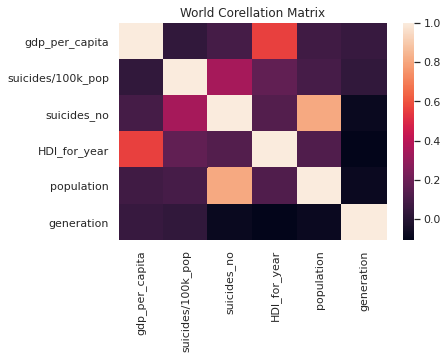

In [21]:
# Correllation matrix for cummulative country statistics
sns.heatmap(df_country_whole.corr())
ax = plt.axes()
ax.set_title("World Corellation Matrix")
plt.show()

In [22]:
# Ranked correlations between suicides_no and suicides/100k_pop
# No feature had a strong enough correlation to be considered for regression
# 
print(df_country_whole.corr()['suicides_no'].sort_values())
print(df_country_whole.corr()['suicides/100k_pop'].sort_values())


generation          -0.080899
gdp_per_capita       0.093967
HDI_for_year         0.132584
suicides/100k_pop    0.350454
population           0.812873
suicides_no          1.000000
Name: suicides_no, dtype: float64
generation           0.037081
gdp_per_capita       0.038206
population           0.097032
HDI_for_year         0.169203
suicides_no          0.350454
suicides/100k_pop    1.000000
Name: suicides/100k_pop, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



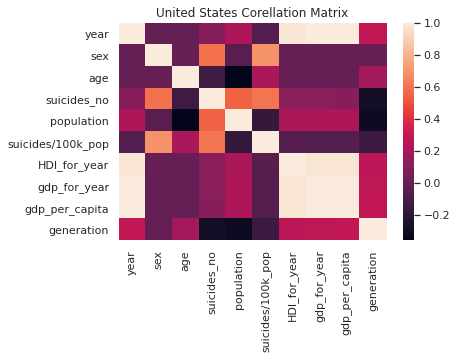

In [23]:
# Correlation matrix for specific country 
df_country = df[df['country'] == 'United States']
sns.heatmap(df_country.corr())
ax = plt.axes()
ax.set_title("United States Corellation Matrix")
plt.show()

In [24]:
# Ranked correlations between features and suicides_no
# We chose to focus on suicides_no over suicides/100k_pop since we are only focusing on one country,
#  and therefore do not have to account for population differences as much as before

# Sex and population are the only valid features that are somehwat correlated with suicides_no
df_country.corr()['suicides_no'].sort_values()

generation          -0.288954
age                 -0.135654
gdp_per_capita       0.106406
year                 0.106921
HDI_for_year         0.109685
gdp_for_year         0.109887
population           0.549784
sex                  0.592998
suicides/100k_pop    0.602962
suicides_no          1.000000
Name: suicides_no, dtype: float64

In [25]:
# df.loc[high_suicide_countries]

In [26]:
df

,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,1,0,21,312900,6.71,0.2275,2156624900,796.0,2
1,Albania,1987,1,2,16,308000,5.19,0.2275,2156624900,796.0,5
2,Albania,1987,0,0,14,289700,4.83,0.2275,2156624900,796.0,2
3,Albania,1987,1,5,1,21800,4.59,0.2275,2156624900,796.0,1
4,Albania,1987,1,1,9,274300,3.28,0.2275,2156624900,796.0,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,0,2,107,3620833,2.96,0.2385,63067077179,2309.0,2
27816,Uzbekistan,2014,0,5,9,348465,2.58,0.2385,63067077179,2309.0,5
27817,Uzbekistan,2014,1,3,60,2762158,2.17,0.2385,63067077179,2309.0,3
27818,Uzbekistan,2014,0,3,44,2631600,1.67,0.2385,63067077179,2309.0,3


In [27]:
data=df_country
# data.groupby('year')['suicides_no'].mean()
# data['year'].unique()
data


,country,year,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
26849,United States,1985,1,5,2177,4064000,53.57,0.6175,4346734000000,19693.0,1
26850,United States,1985,1,4,5302,17971000,29.50,0.6175,4346734000000,19693.0,1
26851,United States,1985,1,1,5134,20986000,24.46,0.6175,4346734000000,19693.0,0
26852,United States,1985,1,2,6053,26589000,22.77,0.6175,4346734000000,19693.0,5
26853,United States,1985,1,0,4267,19962000,21.38,0.6175,4346734000000,19693.0,2
...,...,...,...,...,...,...,...,...,...,...,...
27216,United States,2015,0,1,1444,21555712,6.70,0.7840,18120714000000,60387.0,4
27217,United States,2015,0,0,1132,21633813,5.23,0.7840,18120714000000,60387.0,4
27218,United States,2015,0,5,540,11778666,4.58,0.7840,18120714000000,60387.0,5
27219,United States,2015,1,3,255,21273987,1.20,0.7840,18120714000000,60387.0,3


# From looking at the data, there has been a spike in many countries
* South Korea
* Guyana
* Kazakhstan


In [28]:
# Plotting how much the mean number of suicides has changed over time within a particular country
# Double click on a country in the legend in order to only look at that country, 
# then you can click on others to add them to the view

# fig = px.line(data, x=data['year'].unique(), y=data.groupby('year')['suicides_no'].mean())
# fig = px.bar(data, x=data['age'].unique(), y=data.groupby('age')['suicides_no'].mean())


import plotly.express as px

df_yearly = pd.DataFrame(df[df["country"].isin(high_suicide_countries)].groupby(["country", "year"])['suicides/100k_pop'].mean()).reset_index()
fig = px.line(df_yearly, x="year", y="suicides/100k_pop", color="country", title="Suicides/100k Population from 1985-2016 for High Suicide Countries")
fig.show()

df_yearly = pd.DataFrame(df[df["country"].isin(high_suicide_countries)].groupby(["country", "year"])[['gdp_per_capita', 'suicides/100k_pop']].mean()).reset_index()
fig = px.scatter(df_yearly, x="gdp_per_capita", y="suicides/100k_pop", color="country", title="GDP per Capita vs Suicide per 100,000 Population for High Suicide Countries")
fig.show()


In [29]:
df_south_korea = pd.DataFrame(df[df["country"].isin(["Republic of Korea"])].groupby(["country", "year"])[['suicides/100k_pop', 'gdp_for_year']].mean()).reset_index()

trace1 = go.Line(
    x=df_south_korea['year'].unique(),
    y=df_south_korea['gdp_for_year'],
    name='gdp_for_year',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Line(
    x=df_south_korea['year'].unique(),
    y=df_south_korea['suicides/100k_pop'],
    name='suicides/100k_pop',
    yaxis='y2'

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800,xaxis=dict(
      tickangle=-90
    ))
iplot(fig)
# fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [30]:
df_yearly

,country,year,gdp_per_capita,suicides/100k_pop
0,Austria,1985,9759.0,32.067500
1,Austria,1986,13911.0,33.483333
2,Austria,1987,17415.0,33.823333
3,Austria,1988,18663.0,29.803333
4,Austria,1989,18544.0,29.943333
...,...,...,...,...
520,Ukraine,2010,3141.0,21.922500
521,Ukraine,2011,3788.0,22.000000
522,Ukraine,2012,4096.0,22.372500
523,Ukraine,2014,3299.0,20.875000


In [31]:
df_generation = pd.DataFrame(d[d["country"].isin(high_suicide_countries)].groupby(["country", "generation"])['suicides/100k_pop'].mean()).reset_index()
fig = px.bar(df_generation, x="country", y="suicides/100k_pop", color="generation", title="Generational Breakdown of Suicides/100,000 Population in High Suicide Countries")
fig.show()

In [32]:
df_generation = pd.DataFrame(d[d["country"].isin(high_suicide_countries)].groupby(["country", "sex"])['suicides/100k_pop'].mean()).reset_index()
fig = px.bar(df_generation, x="country", y="suicides/100k_pop", color="sex", title="Sex Breakdown of Suicides/100,000 population in High Suicide Countries")
fig.show()

In [33]:
df_generation = pd.DataFrame(d[d["country"].isin(high_suicide_countries)].groupby(["country", "age"])['suicides/100k_pop'].mean()).reset_index()
fig = px.bar(df_generation, x="country", y="suicides/100k_pop", color="age", title="Age Group Breakdown of Suicides/100,000 population in High Suicide Countries")
fig.show()

# Suicide Demographic Breakdown

In [34]:
# px.treemap(df )
fig = px.treemap(d, path=['sex', 'generation', 'age'], values='suicides_no', title="Demographic Breakdown of Number of Suicides Worldwide")
fig.show()

In [35]:
d.groupby(["generation", 'sex', 'age'])["suicides_no"].sum()

generation       sex     age        
Boomers          female  25-34 years      58511
                         35-54 years     332423
                         55-74 years      70034
                 male    25-34 years     245652
                         35-54 years    1356596
                         55-74 years     221282
G.I. Generation  female  55-74 years      66225
                         75+ years       110428
                 male    55-74 years     142383
                         75+ years       190973
Generation X     female  15-24 years      85557
                         25-34 years     115567
                         35-54 years     106854
                         5-14 years        1861
                 male    15-24 years     308755
                         25-34 years     524984
                         35-54 years     384760
                         5-14 years        4466
Generation Z     female  5-14 years        6141
                 male    5-14 years        9765
Mil

In [36]:
# rm regression_models/*/*.pkl
high_low_suicide_countries = high_suicide_countries.copy().union(low_suicide_countries)
high_low_suicide_countries

Index(['Albania', 'Antigua and Barbuda', 'Armenia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Croatia',
       'Cuba', 'Cyprus', 'Estonia', 'Finland', 'France', 'Georgia', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Maldives', 'Mexico',
       'Paraguay', 'Philippines', 'Qatar', 'Republic of Korea',
       'Russian Federation', 'Serbia', 'Slovenia', 'South Africa', 'Sri Lanka',
       'Suriname', 'Ukraine'],
      dtype='object', name='country')

# Regression and Prediction

Now that we have isolated some promising features, we can move on to building our model. We have tested several types of regressors, including:

*   Linear Regression
*   K-Nearest Neighbors Regression
*   Polynomial Regression
*   SVM Regression
*   SGD Regression
*   Multi-Layer Perceptron Regression
*   Decision Tree Regression

We found that the Decision Tree, SGD, and Polynomial regression models had the highest corellation coefficient, so we went with creating those data visualization on them. From this we discovered a few things:

* For the highest suicide rate countries, the Decision Tree model was the best for all 21 countries
* For the lowest suicide rate countries, the Decision Tree model was still the most used, but some did better with the Polynomial and SGD models. Within these countries, there were many years where the suicide rate was 0.
* We reduced the columns considered for the regression to see if we could maintain accuracy with fewer features based on the correlation matrices above. We found that the GDP per capita and GDP for year do not help the model's performance significantly.






/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 509898292.0442732, tolerance: 180155.22149677423



b0: [51188.22566771]
b1: [-2.58072297e+01  1.09208574e+03  1.08382826e+02  1.45707270e-04
  3.20700541e-01  4.50618175e-10 -1.25697807e-01 -2.10973719e+02]


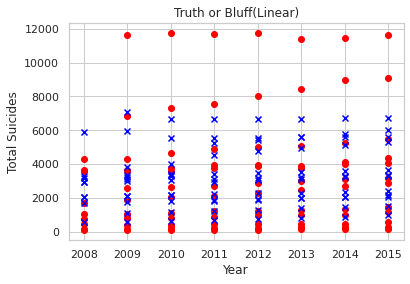

0.5227556727998961


In [37]:

import math
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
import numpy as np


x=data.loc[:,~df.columns.isin( ['suicides/100k_pop', 'country', 'Id', 'suicides_no'])]
y=data.suicides_no.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

# Linear Regression

from sklearn.base import clone
lin_reg = clone(lm.ElasticNet())
lin_reg.fit(X_train, y_train)

b0 =lin_reg.intercept_
b1=lin_reg.coef_
print("b0:",b0)
print("b1:",b1)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], lin_reg.predict(X_test),color='blue', marker='x') 
 
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

print(lin_reg.score(X_test, y_test))

# K-nearest neighbors Regression

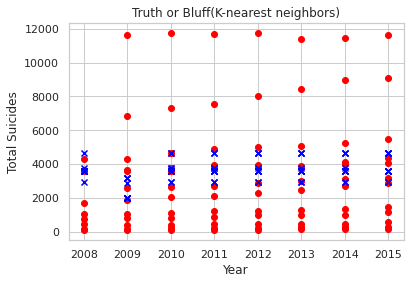

0.13062636844257225


In [38]:

neighbors = KNeighborsRegressor(n_neighbors=10)
neighbors.fit(X_train, y_train)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], neighbors.predict(X_test),color='blue', marker='x') 
 
plt.title("Truth or Bluff(K-nearest neighbors)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

print(neighbors.score(X_test, y_test))

# Polynomial/linear regression

b0: [256803.44170952]
b1: [[ 0.00000000e+00 -1.33836064e+02  3.28195974e+03  1.46536043e+02
   1.53688519e-04  1.06860238e+04  4.35733227e-10 -8.17722664e-02
  -2.40430332e+02]]


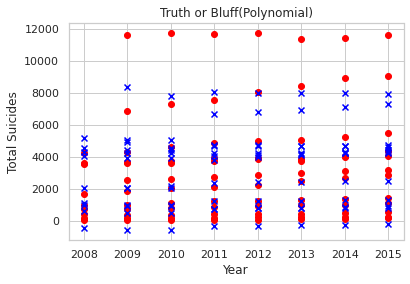

0.6852053002370944


In [39]:

poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X_train)
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly,y_train)


b0 =poly_reg2.intercept_
b1=poly_reg2.coef_
print("b0:",b0)
print("b1:",b1)

# X_grid = np.arange(min(x),max(x),0.1)
# X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], poly_reg2.predict(poly_reg.fit_transform(X_test)),color='blue', marker='x') 
 
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

print(poly_reg2.score(poly_reg.fit_transform(X_test), y_test))

# SVM Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



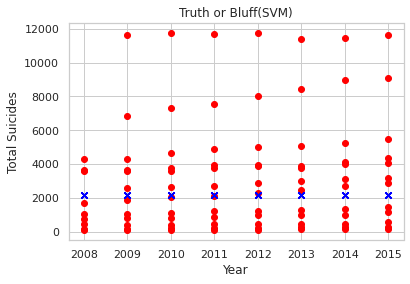

-0.10440534270336621


In [40]:

from sklearn import svm

svm_reg = svm.SVR(kernel='poly', degree=1, epsilon=.1)
svm_reg.fit(X_train,y_train)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], svm_reg.predict(X_test),color='blue', marker='x') 
 
plt.title("Truth or Bluff(SVM)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

print(svm_reg.score(X_test, y_test))

# SGD Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



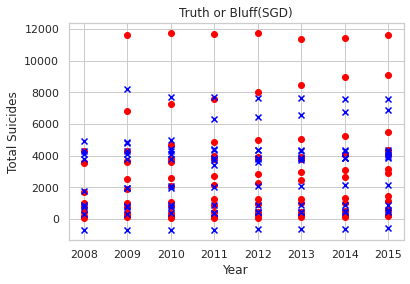

0.6803854585676097


In [41]:


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# neighbors = SGDRegressor(n_neighbors=3)
# neighbors.fit(x, y)

sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_reg.fit(X_train,y_train)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], sgd_reg.predict(X_test),color='blue', marker='x') 
 
plt.title("Truth or Bluff(SGD)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

print(sgd_reg.score(X_test, y_test))

# Multi-layer Perceptron Regressor

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



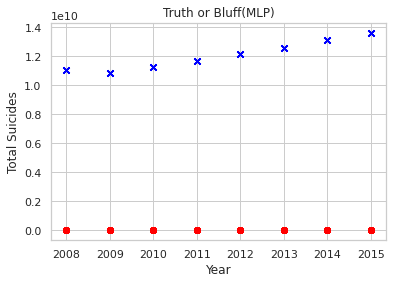

-13801481540744.582


In [42]:
1210912230042443.5

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(x, y)

mlp_reg = MLPRegressor( max_iter=30).fit(X_train, y_train)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], mlp_reg.predict(X_test),color='blue', marker='x') 

plt.title("Truth or Bluff(MLP)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

# A negative R^2 means it would be more accurate if you chose a random constant than your current model
print(mlp_reg.score(X_test, y_test))


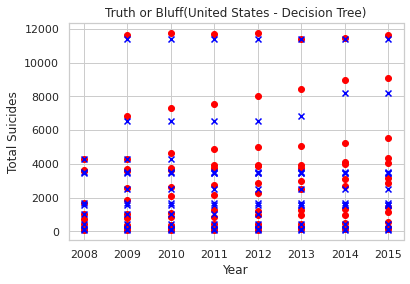

R^2:  0.9660320712990841


In [43]:
# Decision Tree Regression

from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

plt.scatter(X_test['year'],y_test, color='red') 
plt.scatter(X_test['year'], tree_reg.predict(X_test),color='blue', marker='x') 

plt.title("Truth or Bluff(United States - Decision Tree)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

# Correlation coefficient
print("R^2: ", tree_reg.score(X_test, y_test))

In [44]:
import pickle
import os
if not os.path.exists('regression_models'):
    os.makedirs('regression_models')
    
with open("regression_models/UnitedStates.pkl", 'wb') as file:
      pickle.dump(tree_reg, file)

* Here we see that the Decision Tree Regression model is better for all of the lowest suicide countries at modeling the data
* We test the SGD and Polynomial models just to ensure that we find the best model for all of the countries
* Once we determine which model is best for that country, we save the model in a .pkl file for later use

Albania  is using SGD model with an R^2 of  -0.3829391792333843 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



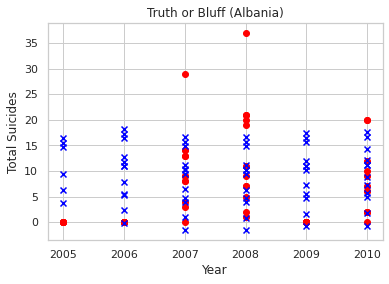

# decision tree models:  0 # SGD models:  1 # polynomial models:  0
Antigua and Barbuda  is using Polynomial model with an R^2 of  -1.2689414989849683 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



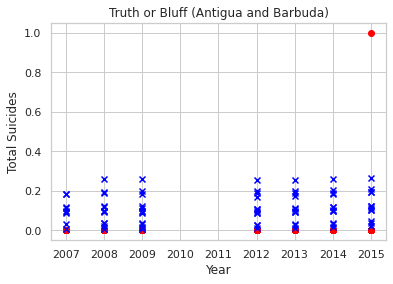

# decision tree models:  0 # SGD models:  1 # polynomial models:  1
Armenia  is using Decision Tree model with an R^2 of  0.5362748161322886 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



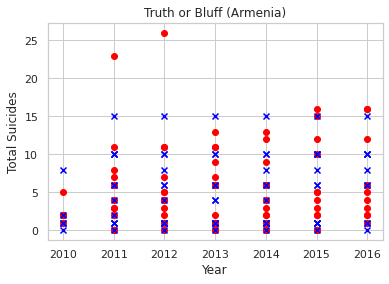

# decision tree models:  1 # SGD models:  1 # polynomial models:  1
Austria  is using Decision Tree model with an R^2 of  0.7890535348328962 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



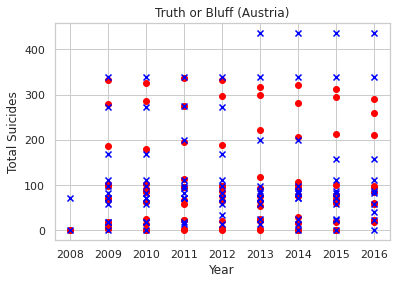

# decision tree models:  2 # SGD models:  1 # polynomial models:  1
Cuba  is using Decision Tree model with an R^2 of  0.9700387489056229 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



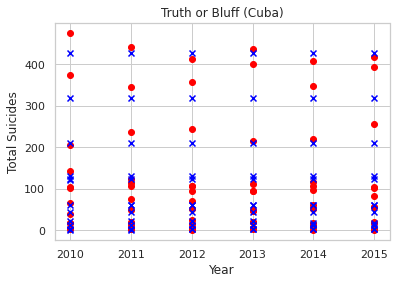

# decision tree models:  3 # SGD models:  1 # polynomial models:  1
Azerbaijan  is using Decision Tree model with an R^2 of  -7.2126767941330545 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



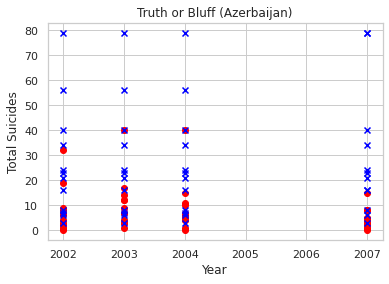

# decision tree models:  4 # SGD models:  1 # polynomial models:  1
Bahamas  is using SGD model with an R^2 of  0.2533810365713416 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



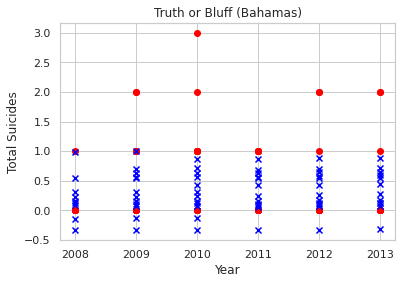

# decision tree models:  4 # SGD models:  2 # polynomial models:  1
Bahrain  is using Polynomial model with an R^2 of  -3.308244659646962 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



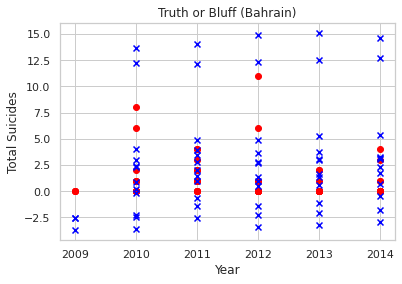

# decision tree models:  4 # SGD models:  2 # polynomial models:  2
Barbados  is using SGD model with an R^2 of  -0.5451577949216333 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



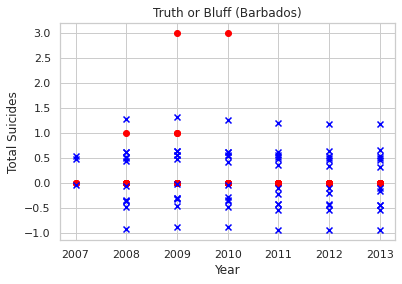

# decision tree models:  4 # SGD models:  3 # polynomial models:  2
Belarus  is using Decision Tree model with an R^2 of  0.8875631721329873 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



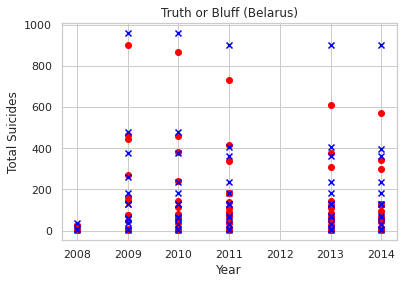

# decision tree models:  5 # SGD models:  3 # polynomial models:  2
Cyprus  is using SGD model with an R^2 of  0.45914272621189267 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



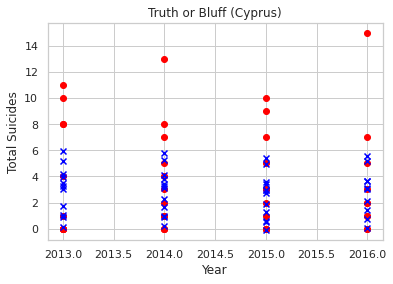

# decision tree models:  5 # SGD models:  4 # polynomial models:  2
Belgium  is using Decision Tree model with an R^2 of  0.9333107091785252 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



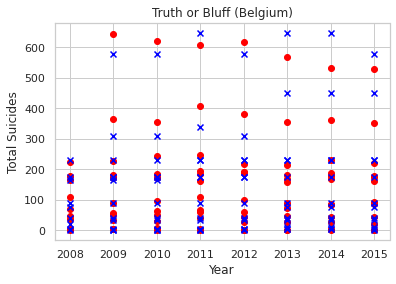

# decision tree models:  6 # SGD models:  4 # polynomial models:  2
Croatia  is using Decision Tree model with an R^2 of  0.7942163251285574 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



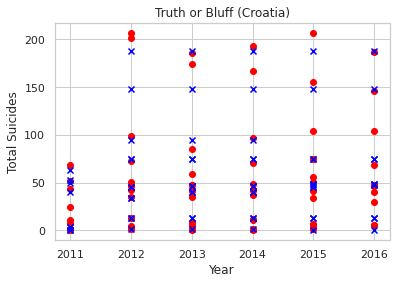

# decision tree models:  7 # SGD models:  4 # polynomial models:  2
Estonia  is using Decision Tree model with an R^2 of  0.9429393936277585 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



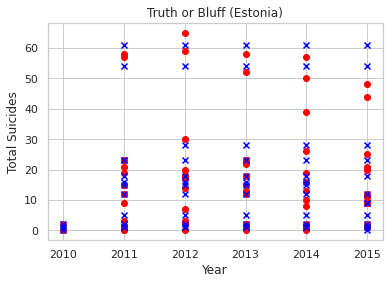

# decision tree models:  8 # SGD models:  4 # polynomial models:  2
Georgia  is using SGD model with an R^2 of  0.41223398805198275 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



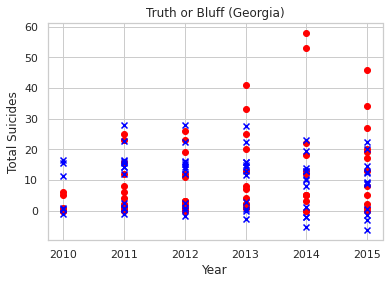

# decision tree models:  8 # SGD models:  5 # polynomial models:  2
Finland  is using Decision Tree model with an R^2 of  0.6537014698551155 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



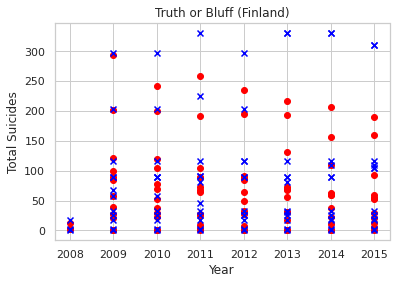

# decision tree models:  9 # SGD models:  5 # polynomial models:  2
France  is using Decision Tree model with an R^2 of  0.874288367060841 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



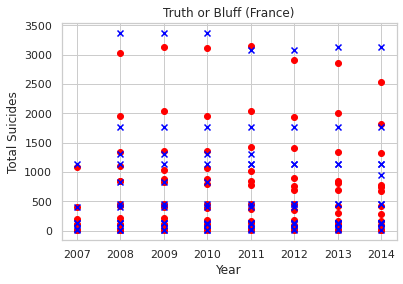

# decision tree models:  10 # SGD models:  5 # polynomial models:  2
Grenada  is using SGD model with an R^2 of  -0.3071464110747353 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



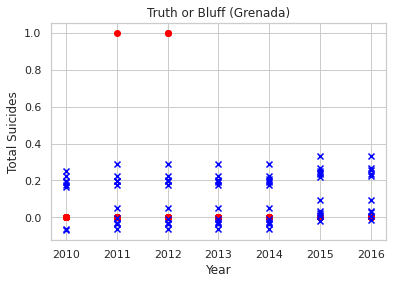

# decision tree models:  10 # SGD models:  6 # polynomial models:  2
Greece  is using Decision Tree model with an R^2 of  0.7396746164031962 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



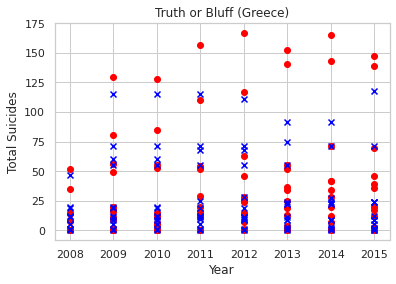

# decision tree models:  11 # SGD models:  6 # polynomial models:  2
Guyana  is using Decision Tree model with an R^2 of  0.8771747190690776 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



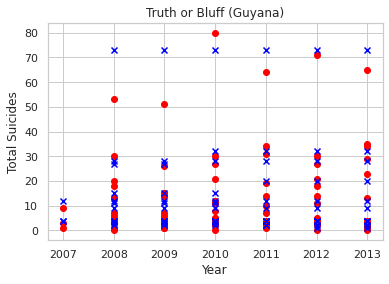

# decision tree models:  12 # SGD models:  6 # polynomial models:  2
Guatemala  is using Decision Tree model with an R^2 of  0.8307142572495052 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



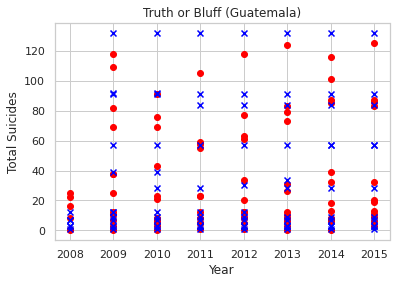

# decision tree models:  13 # SGD models:  6 # polynomial models:  2
Hungary  is using Decision Tree model with an R^2 of  0.5173339796791779 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



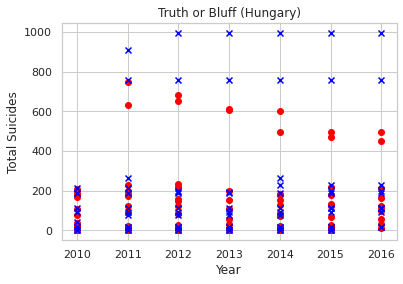

# decision tree models:  14 # SGD models:  6 # polynomial models:  2
Jamaica  is using SGD model with an R^2 of  0.10536289860932757 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



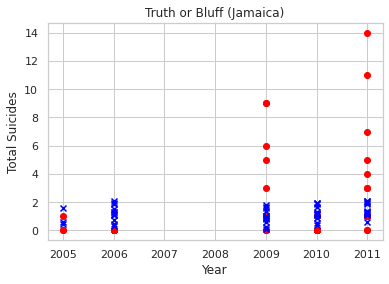

# decision tree models:  14 # SGD models:  7 # polynomial models:  2
Japan  is using Decision Tree model with an R^2 of  0.8707547874299308 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



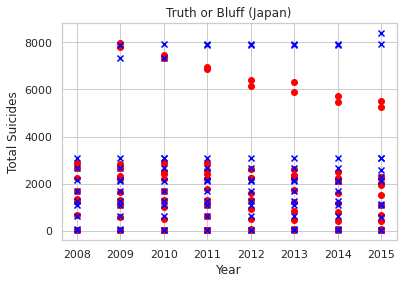

# decision tree models:  15 # SGD models:  7 # polynomial models:  2
Kazakhstan  is using Decision Tree model with an R^2 of  0.8490754077438166 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



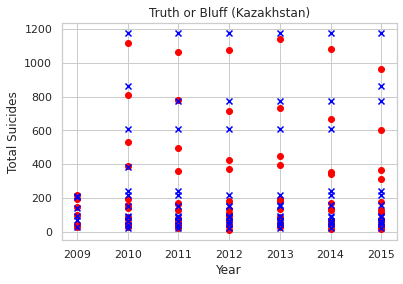

# decision tree models:  16 # SGD models:  7 # polynomial models:  2
Kuwait  is using Decision Tree model with an R^2 of  0.6298782332476176 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



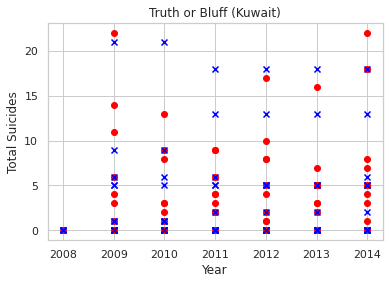

# decision tree models:  17 # SGD models:  7 # polynomial models:  2
Latvia  is using Decision Tree model with an R^2 of  0.8676878174617764 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



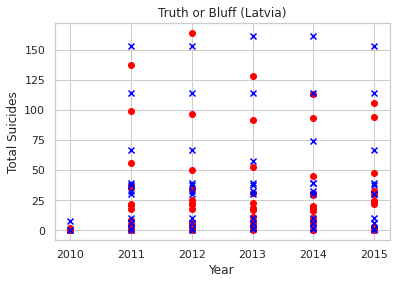

# decision tree models:  18 # SGD models:  7 # polynomial models:  2
Lithuania  is using Decision Tree model with an R^2 of  0.8731377402483042 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



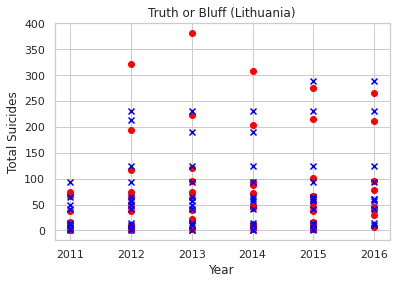

# decision tree models:  19 # SGD models:  7 # polynomial models:  2
Maldives  is using SGD model with an R^2 of  -0.23887695521651886 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



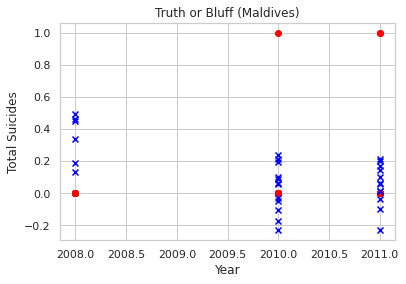

# decision tree models:  19 # SGD models:  8 # polynomial models:  2
Mexico  is using Decision Tree model with an R^2 of  0.8841722895645712 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



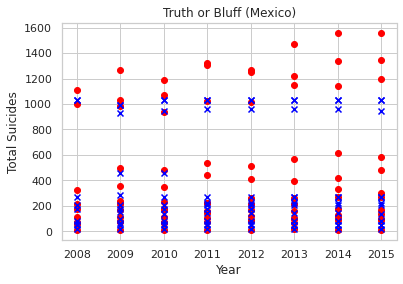

# decision tree models:  20 # SGD models:  8 # polynomial models:  2
Paraguay  is using Decision Tree model with an R^2 of  0.6948777225687484 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



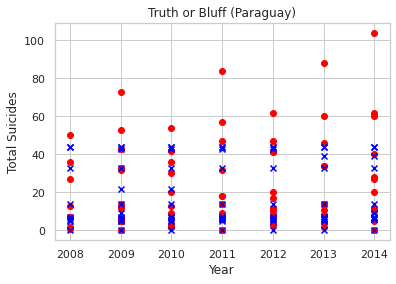

# decision tree models:  21 # SGD models:  8 # polynomial models:  2
Philippines  is using Decision Tree model with an R^2 of  0.8960477886925172 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



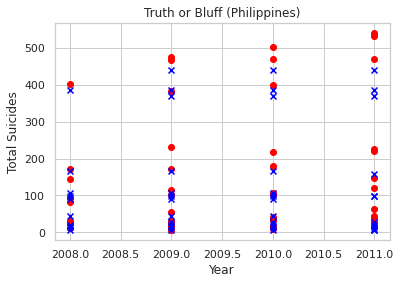

# decision tree models:  22 # SGD models:  8 # polynomial models:  2
Qatar  is using Polynomial model with an R^2 of  0.9037113442842832 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



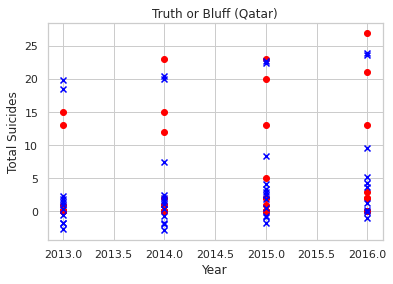

# decision tree models:  22 # SGD models:  8 # polynomial models:  3
Republic of Korea  is using Decision Tree model with an R^2 of  0.550120636923894 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



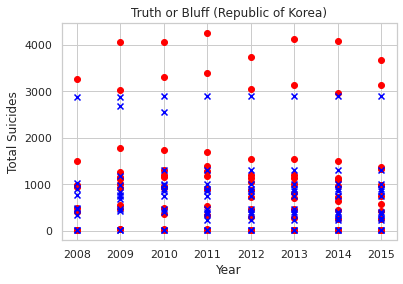

# decision tree models:  23 # SGD models:  8 # polynomial models:  3
Russian Federation  is using Decision Tree model with an R^2 of  0.38243223838072926 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



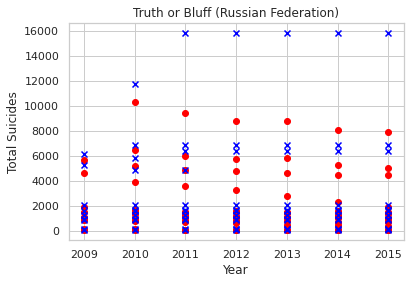

# decision tree models:  24 # SGD models:  8 # polynomial models:  3
Serbia  is using Decision Tree model with an R^2 of  0.8004314826072383 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



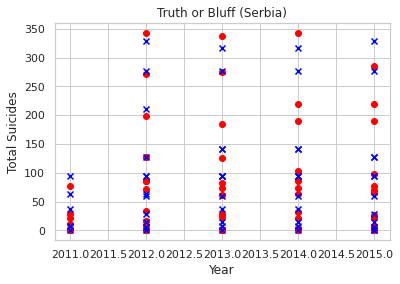

# decision tree models:  25 # SGD models:  8 # polynomial models:  3
Ukraine  is using Decision Tree model with an R^2 of  0.8389012086416592 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



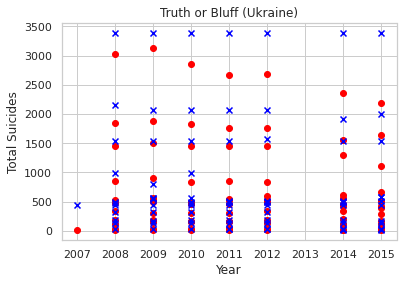

# decision tree models:  26 # SGD models:  8 # polynomial models:  3
Slovenia  is using Decision Tree model with an R^2 of  0.9349576808951671 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



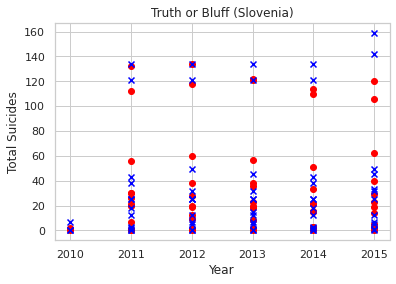

# decision tree models:  27 # SGD models:  8 # polynomial models:  3
South Africa  is using Decision Tree model with an R^2 of  0.805597668079379 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



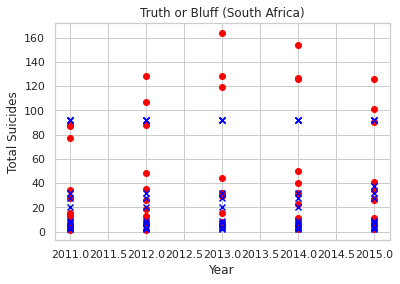

# decision tree models:  28 # SGD models:  8 # polynomial models:  3
Sri Lanka  is using Decision Tree model with an R^2 of  0.8628991744474249 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



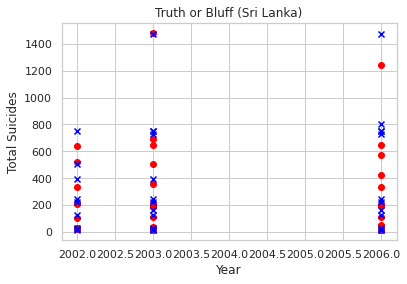

# decision tree models:  29 # SGD models:  8 # polynomial models:  3
Suriname  is using Decision Tree model with an R^2 of  0.8799774393683023 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



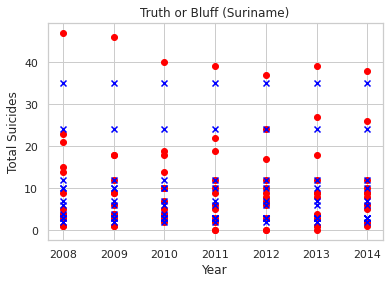

# decision tree models:  30 # SGD models:  8 # polynomial models:  3


In [45]:
import pickle

df_highest_suicide = df[df['country'].isin(high_low_suicide_countries)]

tree_counter = 0
sgd_counter = 0
poly_counter = 0

large_acc=[]

for country in df_highest_suicide["country"].unique():
  curr_df = df_highest_suicide[df_highest_suicide["country"] == country]
  filename = "regression_models/"+country.replace(" ", "")+".pkl"
  # print(curr_df)

  x=curr_df.loc[:,~curr_df.columns.isin( ['suicides/100k_pop', 'country', 'Id', 'suicides_no'])]
  y=curr_df.suicides_no.values.reshape(-1,1)

  X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

  # Decision Tree
  tree_reg = tree.DecisionTreeRegressor()
  tree_reg.fit(X_train, y_train)
  tree_score = tree_reg.score(X_test, y_test)

  # SGD
  sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
  sgd_reg.fit(X_train,y_train)
  sgd_score = sgd_reg.score(X_test, y_test)

  # Polynomial
  poly_reg = PolynomialFeatures(degree=1)
  X_poly = poly_reg.fit_transform(X_train)
  lin_reg2 = LinearRegression()
  lin_reg2.fit(X_poly,y_train)
  poly_score = lin_reg2.score(poly_reg.fit_transform(X_test), y_test)

  # Linear Regression
  lin_reg = clone(LinearRegression())

  if poly_score >= sgd_score and poly_score >= tree_score:
    print(country, " is using Polynomial model with an R^2 of ", poly_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], lin_reg2.predict(poly_reg.fit_transform(X_test)),color='blue', marker='x')  
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')   
    plt.show()
    poly_counter += 1
    large_acc.append(poly_score)
    with open(filename, 'wb') as file:
      pickle.dump(lin_reg2, file)

  elif sgd_score >= poly_score and sgd_score >= tree_score:
    print(country, " is using SGD model with an R^2 of ", sgd_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], sgd_reg.predict(X_test),color='blue', marker='x')  
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')      
    plt.show()
    large_acc.append(sgd_score)
    sgd_counter += 1

    with open(filename, 'wb') as file:
      pickle.dump(sgd_reg, file)

  else:
    print(country, " is using Decision Tree model with an R^2 of ", tree_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], tree_reg.predict(X_test),color='blue', marker='x') 
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')       
    plt.show()
    large_acc.append(tree_score)
    tree_counter += 1

    with open(filename, 'wb') as file:
      pickle.dump(tree_reg, file)
  
  print("# decision tree models: ", tree_counter, "# SGD models: ", sgd_counter, "# polynomial models: ", poly_counter)

* Here we see that the Decision Tree Regression model is better for all of the lowest suicide countries at modeling the data
* We test the SGD and Polynomial models just to ensure that we find the best model for all of the countries
* Once we determine which model is best for that country, we save the model in a .pkl file for later use


Albania  is using SGD model with an R^2 of  -0.37817661632584065 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



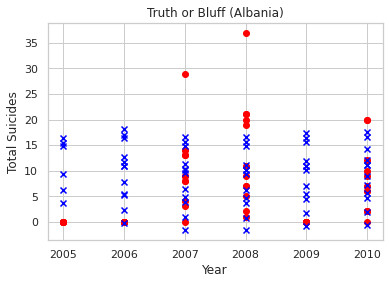

# decision tree models:  0 # SGD models:  1 # polynomial models:  0
Antigua and Barbuda  is using Polynomial model with an R^2 of  -1.2689414989849683 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



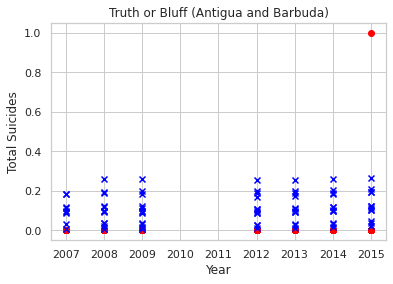

# decision tree models:  0 # SGD models:  1 # polynomial models:  1
Armenia  is using Decision Tree model with an R^2 of  0.5236564437821468 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



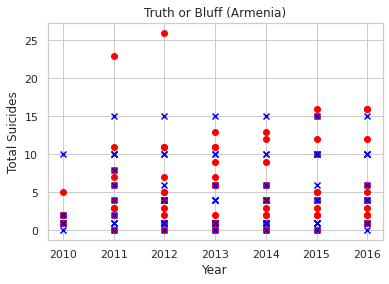

# decision tree models:  1 # SGD models:  1 # polynomial models:  1
Azerbaijan  is using Decision Tree model with an R^2 of  -6.507071765322158 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



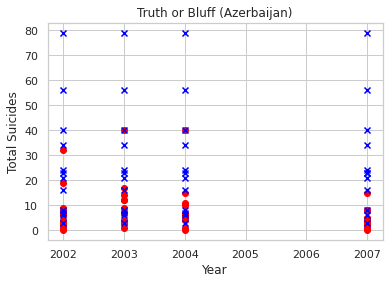

# decision tree models:  2 # SGD models:  1 # polynomial models:  1
Bahamas  is using SGD model with an R^2 of  0.25129065374646253 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



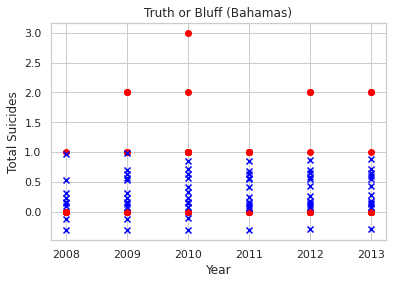

# decision tree models:  2 # SGD models:  2 # polynomial models:  1
Bahrain  is using Polynomial model with an R^2 of  -3.308244659646962 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



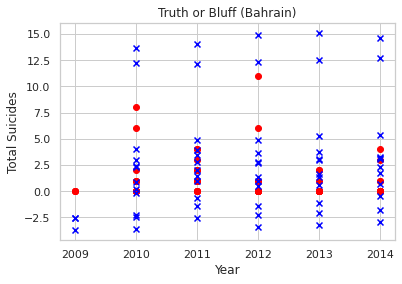

# decision tree models:  2 # SGD models:  2 # polynomial models:  2
Barbados  is using SGD model with an R^2 of  -0.5373126680307327 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



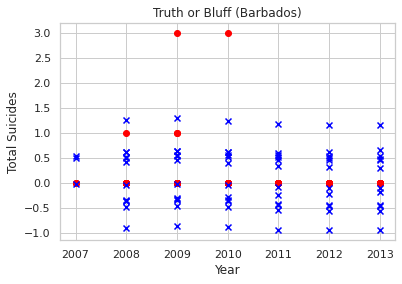

# decision tree models:  2 # SGD models:  3 # polynomial models:  2
Cyprus  is using SGD model with an R^2 of  0.46584564794603744 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



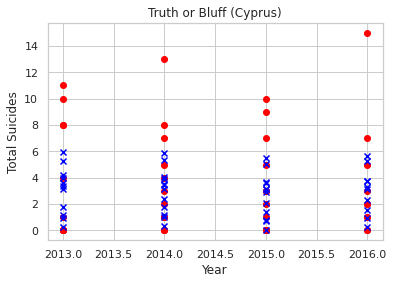

# decision tree models:  2 # SGD models:  4 # polynomial models:  2
Georgia  is using Decision Tree model with an R^2 of  0.48394202958647353 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



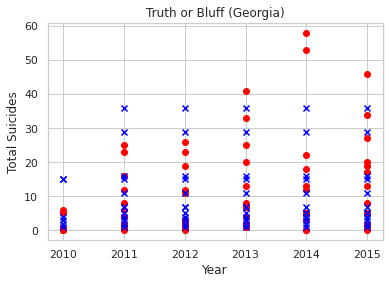

# decision tree models:  3 # SGD models:  4 # polynomial models:  2
Grenada  is using Decision Tree model with an R^2 of  -0.04000000000000026 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



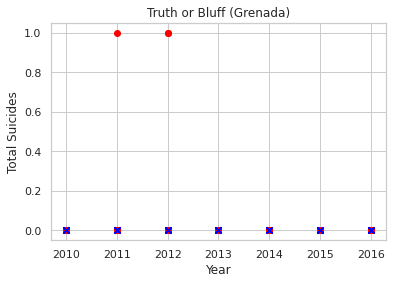

# decision tree models:  4 # SGD models:  4 # polynomial models:  2
Greece  is using Decision Tree model with an R^2 of  0.744869509476797 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



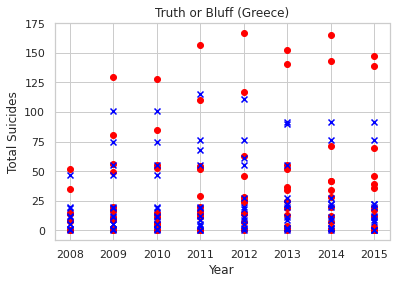

# decision tree models:  5 # SGD models:  4 # polynomial models:  2
Guatemala  is using Decision Tree model with an R^2 of  0.8059216297192725 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



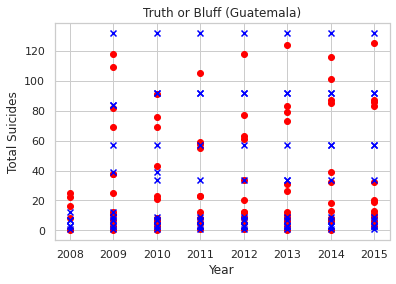

# decision tree models:  6 # SGD models:  4 # polynomial models:  2
Jamaica  is using SGD model with an R^2 of  0.11341852676841924 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



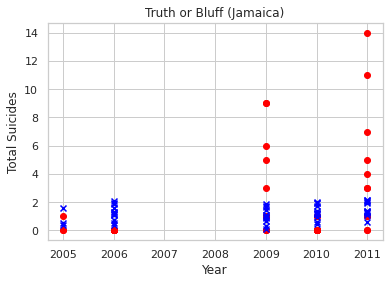

# decision tree models:  6 # SGD models:  5 # polynomial models:  2
Kuwait  is using Decision Tree model with an R^2 of  0.6360232945091515 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



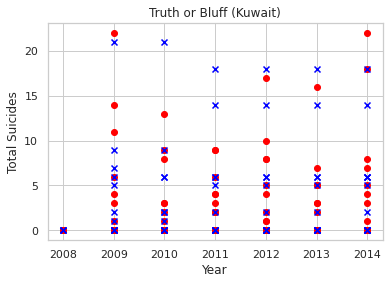

# decision tree models:  7 # SGD models:  5 # polynomial models:  2
Maldives  is using SGD model with an R^2 of  -0.2485485712195423 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



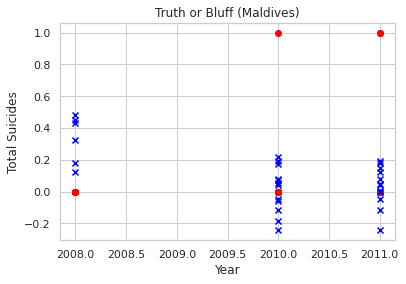

# decision tree models:  7 # SGD models:  6 # polynomial models:  2
Mexico  is using Decision Tree model with an R^2 of  0.8852645352038956 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



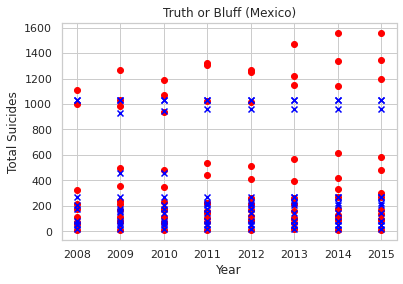

# decision tree models:  8 # SGD models:  6 # polynomial models:  2
Paraguay  is using Decision Tree model with an R^2 of  0.6849481926254795 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



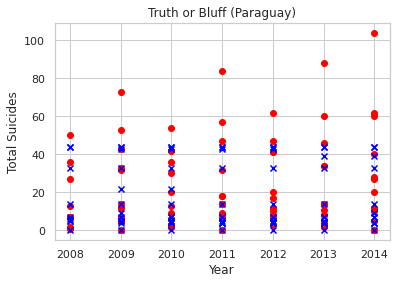

# decision tree models:  9 # SGD models:  6 # polynomial models:  2
Philippines  is using Decision Tree model with an R^2 of  0.8848339676942303 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



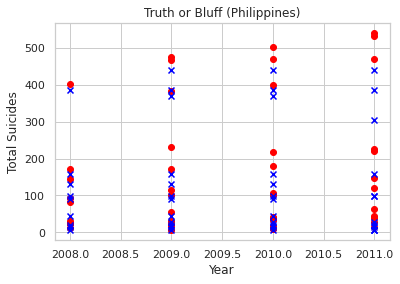

# decision tree models:  10 # SGD models:  6 # polynomial models:  2
Qatar  is using Polynomial model with an R^2 of  0.9037113442842832 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



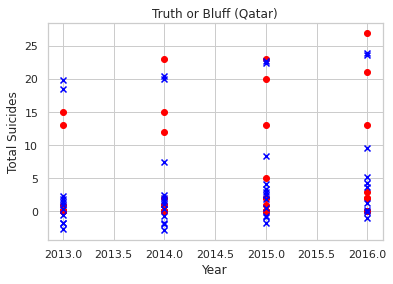

# decision tree models:  10 # SGD models:  6 # polynomial models:  3
South Africa  is using Decision Tree model with an R^2 of  0.8417058191616514 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



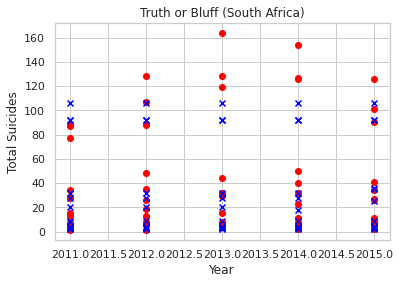

# decision tree models:  11 # SGD models:  6 # polynomial models:  3


In [46]:
# Here we see that the Decision Tree Regression model is better for all of the lowest suicide countries at modeling the data
# We test the SGD and Polynomial models just to ensure that we find the best model for all of the countries
# Once we determine which model is best for that country, we save the model in a .pkl file 
# for later use

import pickle

df_lowest_suicide = df[df['country'].isin(low_suicide_countries)]

tree_counter = 0
sgd_counter = 0
poly_counter = 0

for country in df_lowest_suicide["country"].unique():
  curr_df = df_lowest_suicide[df_lowest_suicide["country"].isin([country])]
  filename = "regression_models/"+country.replace(" ", "")+".pkl"

  x=curr_df.loc[:,~curr_df.columns.isin( ['suicides/100k_pop', 'country', 'Id', 'suicides_no'])]
  y=curr_df.suicides_no.values.reshape(-1,1)

  X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

  # Decision Tree
  tree_reg = tree.DecisionTreeRegressor()
  tree_reg.fit(X_train, y_train)
  tree_score = tree_reg.score(X_test, y_test)

  # SGD
  sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
  sgd_reg.fit(X_train,y_train)
  sgd_score = sgd_reg.score(X_test, y_test)

  # Polynomial
  poly_reg = PolynomialFeatures(degree=1)
  X_poly = poly_reg.fit_transform(X_train)
  lin_reg2 = LinearRegression()
  lin_reg2.fit(X_poly,y_train)
  poly_score = lin_reg2.score(poly_reg.fit_transform(X_test), y_test)

  if poly_score >= sgd_score and poly_score >= tree_score:
    print(country, " is using Polynomial model with an R^2 of ", poly_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], lin_reg2.predict(poly_reg.fit_transform(X_test)),color='blue', marker='x')
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')      
    plt.show()
    poly_counter += 1
    with open(filename, 'wb') as file:
      pickle.dump(lin_reg2, file)

  elif sgd_score >= poly_score and sgd_score >= tree_score:
    print(country, " is using SGD model with an R^2 of ", sgd_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], sgd_reg.predict(X_test),color='blue', marker='x')
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')      
    plt.show()
    sgd_counter += 1

    with open(filename, 'wb') as file:
      pickle.dump(sgd_reg, file)

  else:
    print(country, " is using Decision Tree model with an R^2 of ", tree_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], tree_reg.predict(X_test),color='blue', marker='x')
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')      
    plt.show()
    tree_counter += 1

    with open(filename, 'wb') as file:
      pickle.dump(tree_reg, file)
  
  print("# decision tree models: ", tree_counter, "# SGD models: ", sgd_counter, "# polynomial models: ", poly_counter)

Albania  is using SGD model with an R^2 of  -0.7569076436765343 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



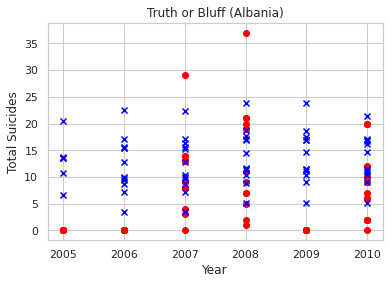

# decision tree models:  0 # SGD models:  1 # polynomial models:  0
Antigua and Barbuda  is using Polynomial model with an R^2 of  -1.127397554438374 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



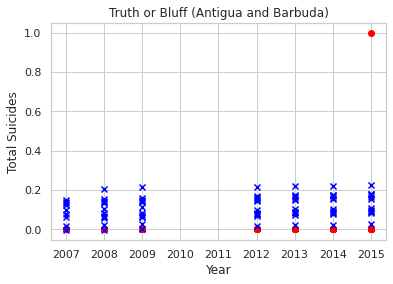

# decision tree models:  0 # SGD models:  1 # polynomial models:  1
Armenia  is using Decision Tree model with an R^2 of  0.671922318896313 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



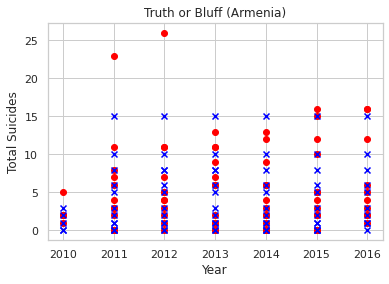

# decision tree models:  1 # SGD models:  1 # polynomial models:  1
Austria  is using Decision Tree model with an R^2 of  0.765286006841621 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



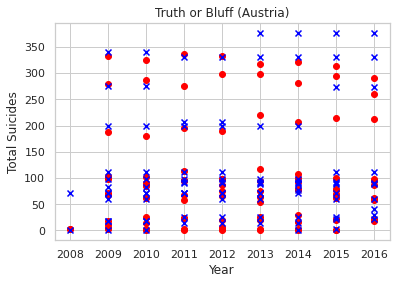

# decision tree models:  2 # SGD models:  1 # polynomial models:  1
Cuba  is using Decision Tree model with an R^2 of  0.6969772299749951 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



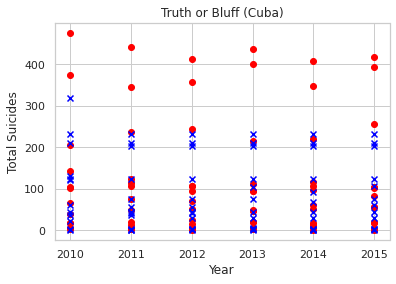

# decision tree models:  3 # SGD models:  1 # polynomial models:  1
Azerbaijan  is using SGD model with an R^2 of  -0.16770227724589315 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



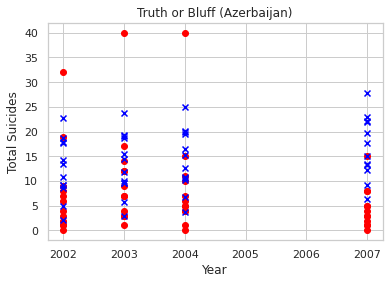

# decision tree models:  3 # SGD models:  2 # polynomial models:  1
Bahamas  is using SGD model with an R^2 of  0.2818803726981519 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



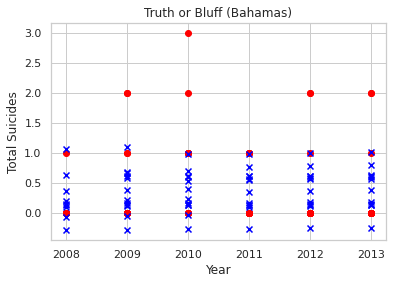

# decision tree models:  3 # SGD models:  3 # polynomial models:  1
Bahrain  is using Decision Tree model with an R^2 of  -0.9694288012872075 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



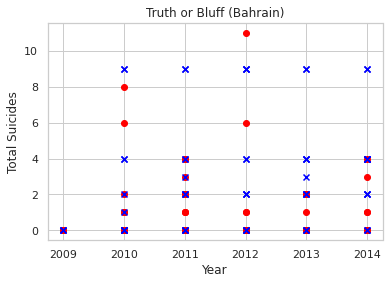

# decision tree models:  4 # SGD models:  3 # polynomial models:  1
Barbados  is using SGD model with an R^2 of  -0.5712546593447287 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



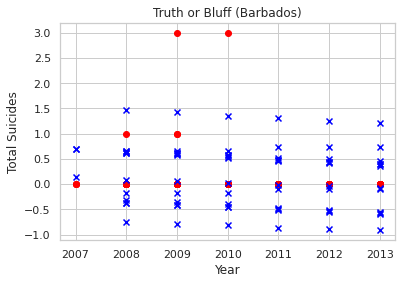

# decision tree models:  4 # SGD models:  4 # polynomial models:  1
Belarus  is using Decision Tree model with an R^2 of  0.5650209687771954 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



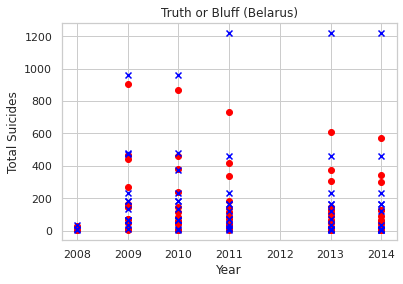

# decision tree models:  5 # SGD models:  4 # polynomial models:  1
Cyprus  is using Decision Tree model with an R^2 of  0.7000558035714286 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



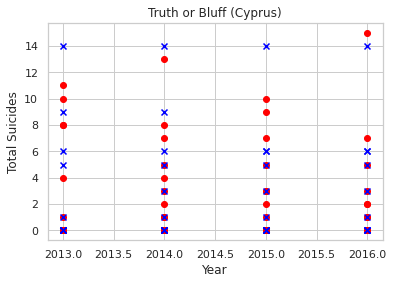

# decision tree models:  6 # SGD models:  4 # polynomial models:  1
Belgium  is using Decision Tree model with an R^2 of  0.9286352994949069 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



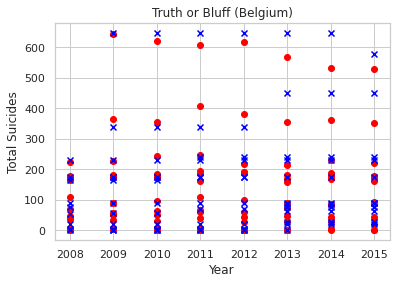

# decision tree models:  7 # SGD models:  4 # polynomial models:  1
Croatia  is using Decision Tree model with an R^2 of  0.896664043394224 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



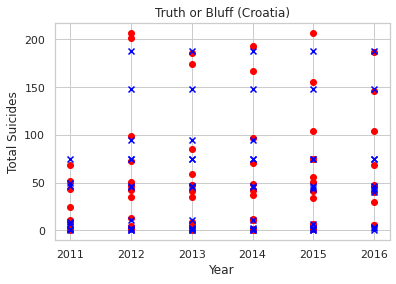

# decision tree models:  8 # SGD models:  4 # polynomial models:  1
Estonia  is using Decision Tree model with an R^2 of  0.8765306587176478 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



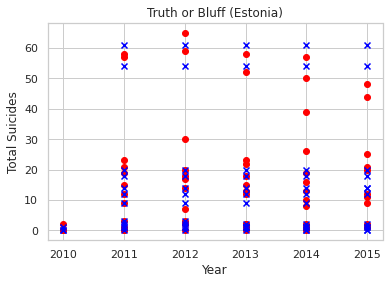

# decision tree models:  9 # SGD models:  4 # polynomial models:  1
Georgia  is using SGD model with an R^2 of  0.3368976481613184 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



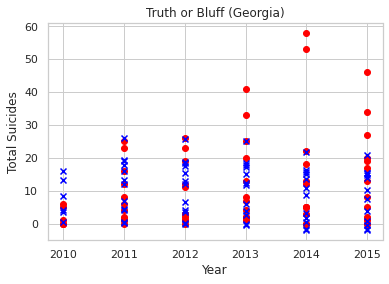

# decision tree models:  9 # SGD models:  5 # polynomial models:  1
Finland  is using Decision Tree model with an R^2 of  0.6052955847590471 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



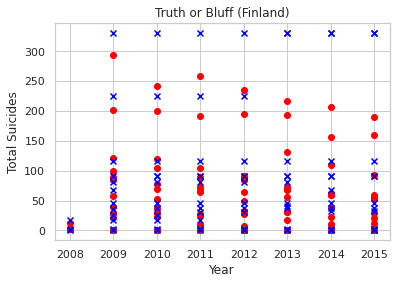

# decision tree models:  10 # SGD models:  5 # polynomial models:  1
France  is using Decision Tree model with an R^2 of  0.7592985798571278 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



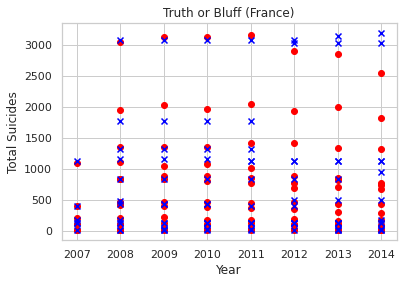

# decision tree models:  11 # SGD models:  5 # polynomial models:  1
Grenada  is using SGD model with an R^2 of  -0.34352884278422957 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



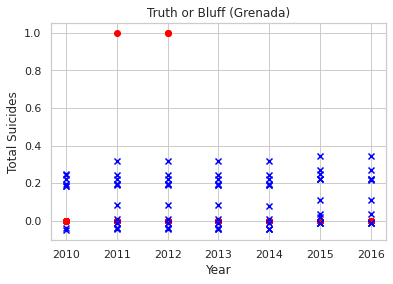

# decision tree models:  11 # SGD models:  6 # polynomial models:  1
Greece  is using Decision Tree model with an R^2 of  0.7076763979894823 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



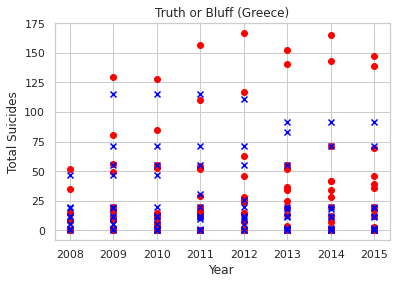

# decision tree models:  12 # SGD models:  6 # polynomial models:  1
Guyana  is using Polynomial model with an R^2 of  0.24961182816138527 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



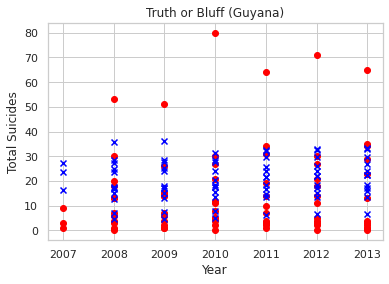

# decision tree models:  12 # SGD models:  6 # polynomial models:  2
Guatemala  is using Polynomial model with an R^2 of  0.22478280874509837 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



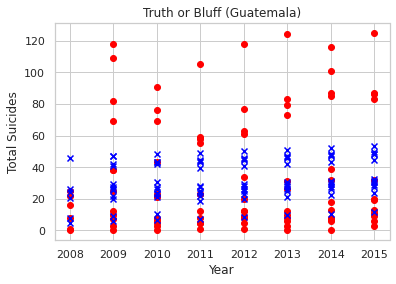

# decision tree models:  12 # SGD models:  6 # polynomial models:  3
Hungary  is using Decision Tree model with an R^2 of  0.4337974082289393 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



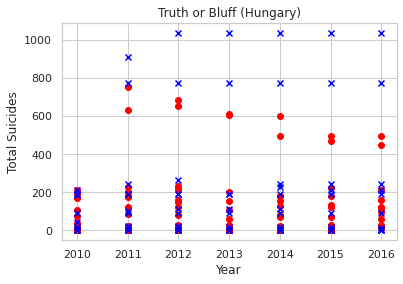

# decision tree models:  13 # SGD models:  6 # polynomial models:  3
Jamaica  is using SGD model with an R^2 of  0.11608623622869196 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



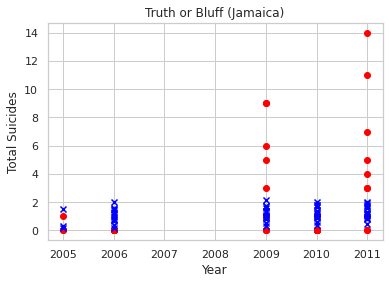

# decision tree models:  13 # SGD models:  7 # polynomial models:  3
Japan  is using Decision Tree model with an R^2 of  0.7559504379185042 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



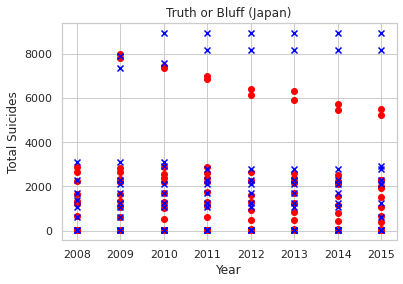

# decision tree models:  14 # SGD models:  7 # polynomial models:  3
Kazakhstan  is using SGD model with an R^2 of  0.13140930054814182 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



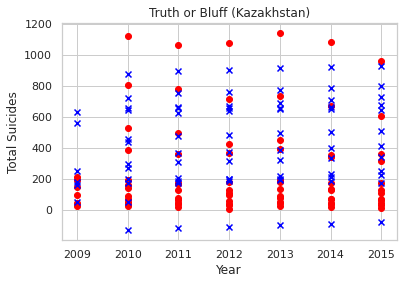

# decision tree models:  14 # SGD models:  8 # polynomial models:  3
Kuwait  is using Decision Tree model with an R^2 of  0.5745726818938135 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



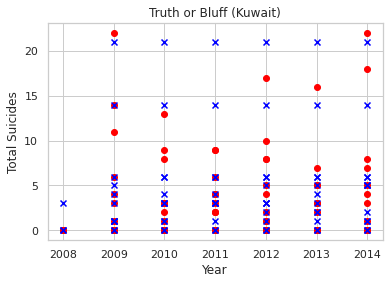

# decision tree models:  15 # SGD models:  8 # polynomial models:  3
Latvia  is using Decision Tree model with an R^2 of  0.8980007265424439 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



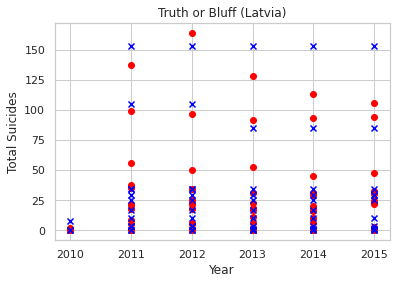

# decision tree models:  16 # SGD models:  8 # polynomial models:  3
Lithuania  is using Decision Tree model with an R^2 of  0.7897846579845419 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



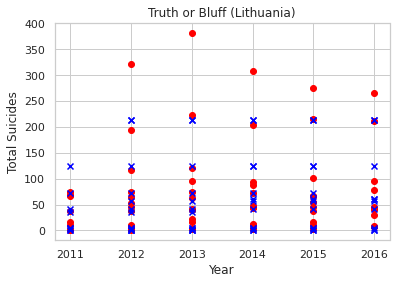

# decision tree models:  17 # SGD models:  8 # polynomial models:  3
Maldives  is using SGD model with an R^2 of  -0.2722387700898248 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



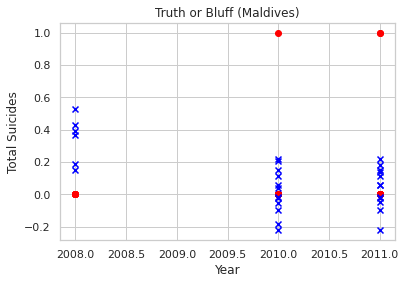

# decision tree models:  17 # SGD models:  9 # polynomial models:  3
Mexico  is using Polynomial model with an R^2 of  0.435436484563193 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



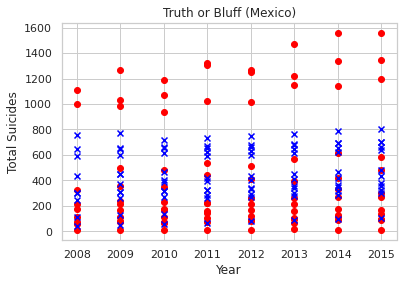

# decision tree models:  17 # SGD models:  9 # polynomial models:  4
Paraguay  is using Polynomial model with an R^2 of  0.26821472769318844 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



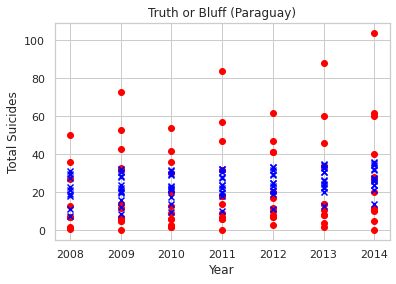

# decision tree models:  17 # SGD models:  9 # polynomial models:  5
Philippines  is using SGD model with an R^2 of  0.3347077625931465 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



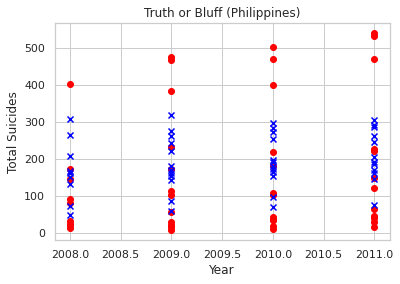

# decision tree models:  17 # SGD models:  10 # polynomial models:  5
Qatar  is using SGD model with an R^2 of  0.892907880757636 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



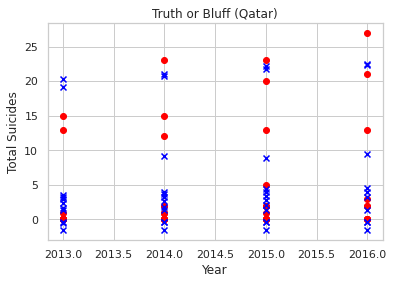

# decision tree models:  17 # SGD models:  11 # polynomial models:  5
Republic of Korea  is using Decision Tree model with an R^2 of  0.6682323148868738 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



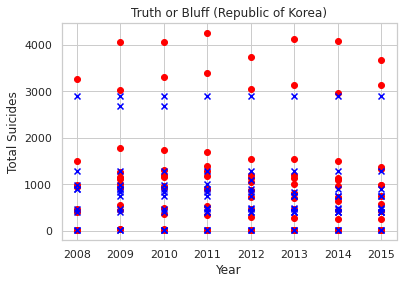

# decision tree models:  18 # SGD models:  11 # polynomial models:  5
Russian Federation  is using Decision Tree model with an R^2 of  0.5311346691404629 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



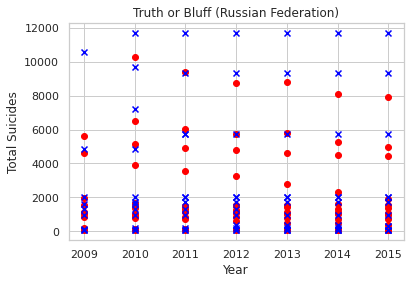

# decision tree models:  19 # SGD models:  11 # polynomial models:  5
Serbia  is using Decision Tree model with an R^2 of  0.815451778880178 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



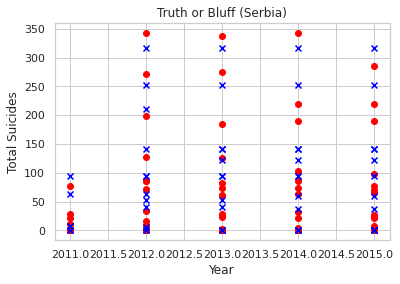

# decision tree models:  20 # SGD models:  11 # polynomial models:  5
Ukraine  is using Decision Tree model with an R^2 of  0.8397211487852771 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



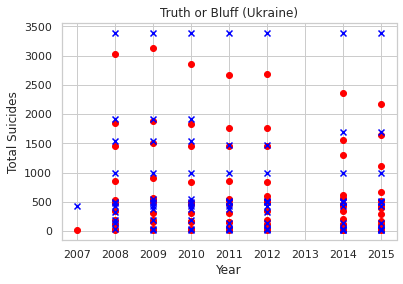

# decision tree models:  21 # SGD models:  11 # polynomial models:  5
Slovenia  is using Decision Tree model with an R^2 of  0.9492485324863859 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



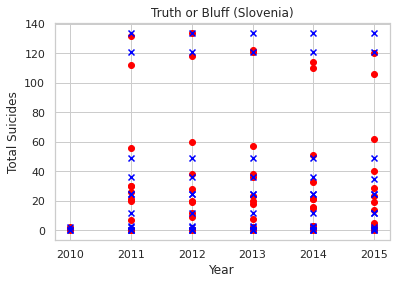

# decision tree models:  22 # SGD models:  11 # polynomial models:  5
South Africa  is using Decision Tree model with an R^2 of  0.7883820923446183 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



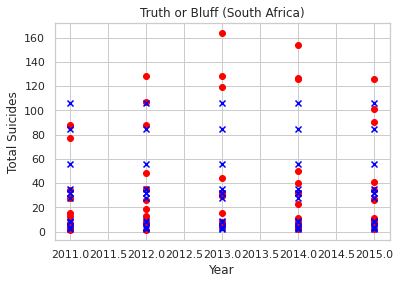

# decision tree models:  23 # SGD models:  11 # polynomial models:  5
Sri Lanka  is using Decision Tree model with an R^2 of  0.8140251510270289 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



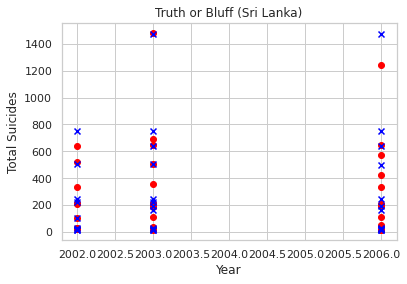

# decision tree models:  24 # SGD models:  11 # polynomial models:  5
Suriname  is using Decision Tree model with an R^2 of  0.8441812370746381 :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



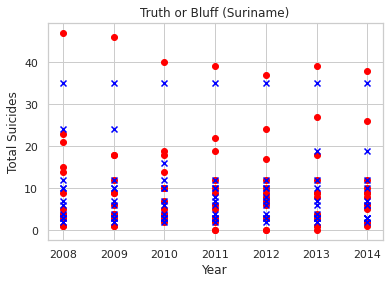

# decision tree models:  25 # SGD models:  11 # polynomial models:  5


In [47]:
import pickle

df_highest_suicide = df[df['country'].isin(high_low_suicide_countries)]

tree_counter = 0
sgd_counter = 0
poly_counter = 0
small_acc = []

for country in df_highest_suicide["country"].unique():
  curr_df = df_highest_suicide[df_highest_suicide["country"] == country]
  filename = "regression_models/"+country.replace(" ", "")+".pkl"
  # print(curr_df)

  x=curr_df.loc[:,~curr_df.columns.isin( ['suicides/100k_pop', 'country', 'Id', 'suicides_no', 'gdp_for_year', 'gdp_per_capita', 'age'])]
  y=curr_df.suicides_no.values.reshape(-1,1)

  X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

  # Decision Tree
  tree_reg = tree.DecisionTreeRegressor()
  tree_reg.fit(X_train, y_train)
  tree_score = tree_reg.score(X_test, y_test)

  # SGD
  sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
  sgd_reg.fit(X_train,y_train)
  sgd_score = sgd_reg.score(X_test, y_test)

  # Polynomial
  poly_reg = PolynomialFeatures(degree=1)
  X_poly = poly_reg.fit_transform(X_train)
  lin_reg2 = LinearRegression()
  lin_reg2.fit(X_poly,y_train)
  poly_score = lin_reg2.score(poly_reg.fit_transform(X_test), y_test)


  if poly_score >= sgd_score and poly_score >= tree_score:
    print(country, " is using Polynomial model with an R^2 of ", poly_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], lin_reg2.predict(poly_reg.fit_transform(X_test)),color='blue', marker='x')  
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')   
    plt.show()
    poly_counter += 1
    small_acc.append(poly_score)

    with open(filename, 'wb') as file:
      pickle.dump(lin_reg2, file)

  elif sgd_score >= poly_score and sgd_score >= tree_score:
    print(country, " is using SGD model with an R^2 of ", sgd_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], sgd_reg.predict(X_test),color='blue', marker='x')  
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')      
    plt.show()
    small_acc.append(sgd_score)
    sgd_counter += 1

    with open(filename, 'wb') as file:
      pickle.dump(sgd_reg, file)

  else:
    print(country, " is using Decision Tree model with an R^2 of ", tree_score, ":")
    plt.scatter(X_test['year'],y_test, color='red') 
    plt.scatter(X_test['year'], tree_reg.predict(X_test),color='blue', marker='x') 
    plt.title("Truth or Bluff ("+country+")" )
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')       
    plt.show()
    small_acc.append(tree_score)
    tree_counter += 1

    with open(filename, 'wb') as file:
      pickle.dump(tree_reg, file)
  
  print("# decision tree models: ", tree_counter, "# SGD models: ", sgd_counter, "# polynomial models: ", poly_counter)

In [48]:
curr_df = df_highest_suicide[df_highest_suicide["country"] == country]
curr_df.loc[:,~curr_df.columns.isin( ['suicides/100k_pop', 'country', 'Id', 'suicides_no', 'gdp_for_year', 'gdp_per_capita', 'age'])]


,year,sex,population,HDI_for_year,generation
24034,1985,1,20500,0.314,5
24035,1985,1,2200,0.314,1
24036,1985,1,16100,0.314,0
24037,1985,1,11700,0.314,1
24038,1985,0,4200,0.314,1
...,...,...,...,...,...
24365,2014,0,47355,0.422,4
24366,2014,0,70884,0.422,2
24367,2014,0,8006,0.422,5
24368,2014,0,47832,0.422,3


In [49]:
df_regressions = pd.DataFrame(high_low_suicide_countries)
df_regressions["small_model_acc"] = small_acc
df_regressions["large_model_acc"] = large_acc
R2 = df_regressions["large_model_acc"] - df_regressions["small_model_acc"]
fig = px.bar(df_regressions, x="country", y=R2, title="Accuracy Difference Between Larger Data Regression and Smaller Data Regression")
fig.show()
# df_regressions

In [50]:
country = "United States"
dataframe = df[df["country"].isin([country])].loc[:,~curr_df.columns.isin(['suicides/100k_pop', 'country', 'Id', 'suicides_no', "gdp_per_capita", "gdp_for_year", 'age'])]
dataframe

,year,sex,population,HDI_for_year,generation
26849,1985,1,4064000,0.6175,1
26850,1985,1,17971000,0.6175,1
26851,1985,1,20986000,0.6175,0
26852,1985,1,26589000,0.6175,5
26853,1985,1,19962000,0.6175,2
...,...,...,...,...,...
27216,2015,0,21555712,0.7840,4
27217,2015,0,21633813,0.7840,4
27218,2015,0,11778666,0.7840,5
27219,2015,1,21273987,0.7840,3


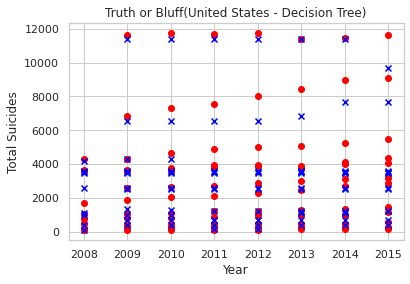

R^2:  0.8264176342415968


In [51]:
x=dataframe
y=df[df['country'].isin([country])].suicides_no.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

us_reg = tree.DecisionTreeRegressor()
us_reg.fit(X_train, y_train)

plt.scatter(X_test['year'],y_test, color='red') 
plt.scatter(X_test['year'], us_reg.predict(X_test),color='blue', marker='x') 

plt.title("Truth or Bluff(United States - Decision Tree)")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

# Correlation coefficient
print("R^2: ", us_reg.score(X_test, y_test))
with open("regression_models/UnitedStates.pkl", 'wb') as file:
      pickle.dump(us_reg, file)  

In [52]:
df_m = pd.DataFrame(d[(df["sex"] == 1)&(df['country'].isin([country]))].groupby(["generation", "year"])['suicides/100k_pop'].mean()).reset_index()
fig = px.line(df_m, x="year", y="suicides/100k_pop", color="generation", title="Suicides/100k Population from 1985-2016 for High Suicide Countries")
fig.show()

In [53]:
haha = df[df["country"].isin([country])]
dataframe.corr()['population'].sort_values()


generation     -0.312157
sex            -0.049391
HDI_for_year    0.216296
year            0.221208
population      1.000000
Name: population, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



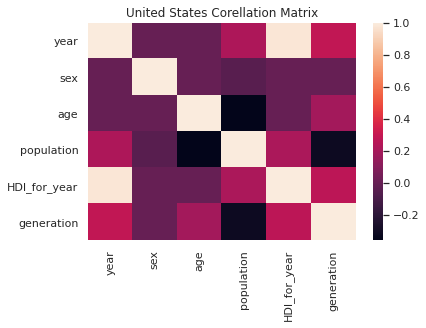

In [54]:
pop_df = df[df["country"].isin([country])].loc[:,~curr_df.columns.isin(['suicides/100k_pop', 'country', 'Id', 'suicides_no', "gdp_per_capita", "gdp_for_year"])]
sns.heatmap(pop_df.corr())
ax = plt.axes()
ax.set_title("United States Corellation Matrix")
plt.show()

       year  sex  generation
26849  1985    1           1
26850  1985    1           1
26851  1985    1           0
26852  1985    1           5
26853  1985    1           2
...     ...  ...         ...
27216  2015    0           4
27217  2015    0           4
27218  2015    0           5
27219  2015    1           3
27220  2015    0           3

[372 rows x 3 columns]


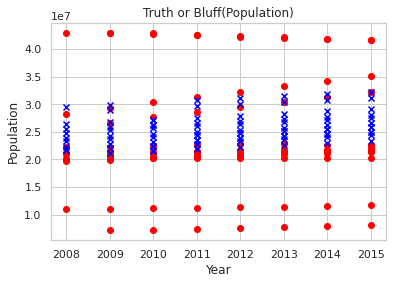

0.2707934571196272


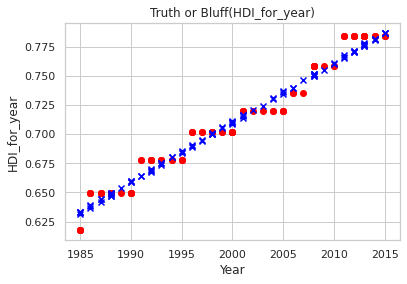

0.9695991071547784


In [55]:
# In order for our suicide regression model to work over time, we need to also be able to simulate the population and HDI growth over time. 
# For this, we will use two regression models since the total population distribution
from sklearn import ensemble
x=df[df["country"].isin([country])].loc[:,~curr_df.columns.isin(['suicides/100k_pop', 'country', 'Id', 'suicides_no', "gdp_per_capita", "gdp_for_year", 'HDI_for_year','population','age'])]
y=data.population.values.reshape(-1,1)
print(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

# Linear Regression

from sklearn.base import clone

pop_regs = []


pop_reg = clone(LinearRegression())
pop_reg.fit(X_train, y_train)

# b0 =pop_reg.intercept_
# b1=pop_reg.coef_
# print("b0:",b0)
# print("b1:",b1)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], pop_reg.predict(X_test),color='blue', marker='x') 
 
plt.title("Truth or Bluff(Population)")
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

print(pop_reg.score(X_test, y_test))


y = data.HDI_for_year.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y)

hdi_reg = clone(LinearRegression())
hdi_reg.fit(X_train, y_train)

plt.scatter(X_test['year'],y_test, color='red') 
 
plt.scatter(X_test['year'], hdi_reg.predict(X_test),color='blue', marker='x') 
 
plt.title("Truth or Bluff(HDI_for_year)")
plt.xlabel('Year')
plt.ylabel('HDI_for_year')
plt.show()

print(hdi_reg.score(X_test, y_test))

# lin

In [56]:
# print(dataframe)

country = "United States"
dataframe = df[df["country"].isin([country])].loc[:,~curr_df.columns.isin(['suicides/100k_pop', 'country', 'Id', 'suicides_no', "gdp_per_capita", "gdp_for_year", 'age'])]

with (open("regression_models/"+country.replace(" ", "")+".pkl", "rb")) as openfile:
  model = pickle.load(openfile)

for i in range(dataframe['year'].max()+1, 2030):
  new_data = dataframe[(dataframe['year']==i-1)].copy()
  # print(len([i]*new_data.size))
  new_data['year'] = [i]*new_data['year'].size
  nd_x=new_data.loc[:,~new_data.columns.isin(['suicides/100k_pop', 'country', 'Id', 'suicides_no', "gdp_per_capita", "gdp_for_year", 'population', 'HDI_for_year', 'age'])]
  # print(nd_x)
  hdi_result = hdi_reg.predict(nd_x)
  
  new_data["HDI_for_year"] = hdi_result

  new_data["population"] = pop_reg.predict(nd_x)
  # new_data['suicides_no'] = model.predict(new_data.loc[:,~new_data.columns.isin(['suicides_no']))
  # print(new_data)
  dataframe = dataframe.append(new_data)

print(dataframe)
predictions = model.predict(dataframe)
fig = px.bar(d.loc[dataframe.index], x=dataframe['year'], y=predictions, color='sex', title='Projected Suicides_no Over Time in the United States from 1985-2030')
fig.show()
# tree_reg.predict(dataframe)
# dataframe
# temp = pd.DataFrame(dataframe[['year', 'sex','age', 'generation', 'population', 'HDI_for_year']])
# temp['suicides_no'] = predictions

       year  sex    population  HDI_for_year  generation
26849  1985    1  4.064000e+06      0.617500           1
26850  1985    1  1.797100e+07      0.617500           1
26851  1985    1  2.098600e+07      0.617500           0
26852  1985    1  2.658900e+07      0.617500           5
26853  1985    1  1.996200e+07      0.617500           2
...     ...  ...           ...           ...         ...
27216  2029    0  3.120629e+07      0.858391           4
27217  2029    0  3.120629e+07      0.858391           4
27218  2029    0  2.964608e+07      0.857929           5
27219  2029    1  3.178822e+07      0.859048           3
27220  2029    0  3.276650e+07      0.858853           3

[540 rows x 5 columns]


In [60]:
import plotly.express as px

df_continent = px.data.gapminder().query("continent=='Europe'")
fig = px.line(df_continent, x="year", y="gdpPercap", color='country')
fig.show()

In [61]:
import plotly.express as px

df_yearly = pd.DataFrame(df[df["country"].isin(high_suicide_countries)].groupby(["country", "year"])['suicides/100k_pop'].mean()).reset_index()
fig = px.line(df_yearly, x="year", y="suicides/100k_pop", color="country")
fig.show()